## **CS577 Final Project** : Predicting Sale Price of Homes in King County, WA


#### **Authors**: Alexandre Makhmudyantsev, Brandon Nguyen, Ryan Martin Elli Cervantes, Triet Lieu

#### **Semester** : Fall 2023.

-------------------

## **Requirements:**
There are four sections of the final project. You are expected to perform the following tasks within each section to fulfill the project requirements. 
1. #### **Data Importing and Pre-processing (25%)**
   - Import dataset and describe characteristics such as dimensions, data types, file types, and import methods used
   - Clean, wrangle, and handle missing data
   - Transform data appropriately using techniques such as aggregation, normalization, and feature construction
   - Reduce redundant data and perform need based discretization
   <br><br>
2. #### **Data Analysis and Visualization (25%)**
   - Identify categorical, ordinal, and numerical variables within data
   - Provide measures of centrality and distribution with visualizations
   - Diagnose for correlations between variables and determine independent and dependent variables
   - Perform exploratory analysis in combination with visualization techniques to discover patterns and features of interest
   <br><br>
3. #### **Data Analytics (25%)**
   - Determine the need for a supervised or unsupervised learning method and identify dependent and independent variables
   - Train, test, and provide accuracy and evaluation metrics for model results
   <br><br>

4. #### **Presentation (25%)**
   - In a 5 to 10 minute presentation, briefly explain the project workflow from the code and results in your markdown notebook
   - State your findings from the data and provide the interpretation of results from your analysis at each stage in the project

-------------------


## Table of Contents
- [1. Data Importing and Pre-processing](#1-data-importing-and-pre-processing)
  - [1.1 The Dataset](#11-the-dataset)
  - [1.2 Data Importing and Exploration](#12-data-importing-and-exploration)
  - [1.3 Data Cleaning](#13-data-cleaning)
  - [1.4 Preliminary Model (Linear Regression)](#14-preliminary-model-linear-regression)
- [2. Data Analysis, Transformation and Visualization](#2-data-analysis-transformation-and-visualization)
  - [2.1 Data Analysis (Through Visualization)](#21-data-analysis-through-visualization)
  - [2.2 Data Transformation](#22-data-transformation)
    - [2.2.1 Normalization](#221-normalization)
    - [2.2.2 Feature Engineering](#222-feature-engineering)
    - [2.2.3 Preliminary Correlation Matrix](#223-preliminary-correlation-matrix)
    - [2.2.4 Removing Redundant Features](#224-removing-redundant-features)
    - [2.2.5 More Feature Engineering (Location Specific)](#225-more-feature-engineering-location-specific)
    - [2.2.6 Removing Redundant Features (Location Specific)](#226-removing-redundant-features-location-specific)
  - [2.3 Correlation Analysis and Identifying Dependent and Independent Features](#23-correlation-analysis-and-identifying-dependent-and-independent-features)
- [3. Data Analytics](#3-data-analytics)
  - [3.1 Linear Regression - Eliminating Interdependent Features](#31-linear-regression-eliminating-interdependent-features)
  - [3.2 Linear Regression - Eliminating Interdependent Features + Correlation Selection](#32-linear-regression-eliminating-interdependent-features-correlation-selection)
  - [3.3 Feature Selection with Principle Component Analysis (PCA)](#33-feature-selection-with-principle-component-analysis-pca)
  - [3.4 Alternate Model - Random Forest](#34-alternate-model-random-forest)


### **Necessary Packages**

In [382]:
# Necessary Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Set pandas to display all columns
pd.set_option('display.max_columns', None)

## **1. Data Importing and Pre-processing**
### **1.1 The Dataset**



The dataset chosen to create a model to predict the sale price of a home contains detailed insight into housing sales in King County for the years 2014 and 2015 and as originally found on Kaggle and is in the format of a CSV.

*Dataset Link:*
- *https://www.kaggle.com/datasets/harlfoxem/housesalesprediction/discussion*




### **1.2 Data Importing and Exploration**



The dataset 21,613 entries, with each entry representing an individual home sale. Each of these sales is further described by 21 features, capturing diverse attributes of the respective homes. The table below provides a detailed breakdown of each feature, including its definition, data type, and additional notes when applicable. This comprehensive dataset will serve as a foundation to predict home prices within the county.

A preliminary data dictionary can be found below which defines summarizes each feature, its data type, and contains additional notes. The data dictionary was primarily created using Kaggle as a resource and verified through dataset exploration below.

*Resources used in helping to defining features:*
- *https://www.kaggle.com/datasets/harlfoxem/housesalesprediction/discussion/207885*
<br></br>


| Feature       | Definition                                                                                       | Data Type | Category    | Additional Notes                                             |
|---------------|--------------------------------------------------------------------------------------------------|-----------|-------------|-------------------------------------------------------------|
| id            | A unique identifier for each house.                                                              | Integer   | Nominal     |                                                             |
| date          | The date of when the house was sold.                                                             | ISO Datetime | Numerical |                                                             |
| price         | The price of what the house was sold at.                                                         | Float     | Numerical   | **Target Variable**                                          |
| bedrooms      | The number of bedrooms in the house.                                                             | Integer   | Numerical   |                                                             |
| bathrooms     | The number of bathrooms in the house.                                                            | Float     | Numerical   | Values are in quarter (0.25) increments                      |
| sqft_living   | The size of the house in square feet (ft<sup>2</sup>).                                           | Integer   | Numerical   |                                                             |
| sqft_lot      | The size of the property in square feet (ft<sup>2</sup>) (entire lot of land).                   | Integer   | Numerical   |                                                             |
| floors        | The number of floors the house has.                                                              | Float     | Numerical   | Values are in half (0.5) increments                          |
| waterfront    | Indicator of whether the property is directly adjacent to a water body.                          | Integer   | Categorical | Values include 0 and 1 (True and False)                      |
| view          | A rating indicating the quality of the view of the house.                                        | Integer   | Ordinal     | Values range from 0 to 4 (The higher, the better the view)   |
| condition     | A rating indicating the condition of the house.                                                  | Integer   | Ordinal     | Values range from 1 to 5 (The higher, the better the condition) |
| grade         | A rating indicating the construction quality of the property.                                    | Integer   | Ordinal     | Values range from 1 to 13 (The higher, the better the construction quality) |
| sqft_above    | The square footage (ft<sup>2</sup>) of the interior house space that is above ground level.      | Integer   | Numerical   |                                                             |
| sqft_basement | The square footage (ft<sup>2</sup>) of the basement.                                             | Integer   | Numerical   |                                                             |
| yr_built      | The year the house was originally built.                                                         | Integer   | Numerical   |                                                             |
| yr_renovated  | The year of the most recent renovation or remodeling of the house.                               | Integer   | Numerical   | 0 is used if home is never renovated                        |
| zip code      | The zip code of the house.                                                                        | Integer   | Categorical |                                                             |
| lat           | The latitude coordinate of the house.                                                            | Float     | Numerical   |                                                             |
| long          | The longitude coordinate of the house.                                                           | Float     | Numerical   |                                                             |
| sqft_lot15    | The average square footage (ft<sup>2</sup>) of interior housing living space for the nearest 15 neighbors. | Integer | Numerical   |                                                             |
| sqft_living15 | The average square footage (ft<sup>2</sup>) of the land lots of the nearest 15 neighbors.        | Integer   | Numerical   |                                                             |

In [383]:
# Initialize the path for the dataset
dataset_path  = "../data/kc_house_data.csv"

# Load the CSV file into a DataFrame
df = pd.read_csv(dataset_path)

# Display the first few rows of the DataFrame to confirm the dataset is loading
df.head()

id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
0      5650     1.0           0     0          3      7        1180   
1      7242     2.0           0     0          3      7        2170   
2     10000     1.0           0     0          3      6         770   
3      5000     1.0           0     0          5      7        1050   
4      8080     1.0           0     0          3      8        1680   

   sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
0              0      1955             0    98178  47.5112 -122.257   
1            400      1951          1991    98125  47.7210 -122.319   
2              0      1933             0    98028  47.7379 -122.233   
3            910      1965             0    98136  47.5208 -122.393   
4              0      1987             0    98074  47.6168 -122.045   

   sqft_living15  sqft_lot15  
0           1340        5650  
1           1690        7639  
2           2720        8062  
3           1360        5000  
4           1800        7503

In [384]:
# Get a summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [385]:
df.describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  2.161300e+04  2.161300e+04  21613.000000  21613.000000  21613.000000   
mean   4.580302e+09  5.400881e+05      3.370842      2.114757   2079.899736   
std    2.876566e+09  3.671272e+05      0.930062      0.770163    918.440897   
min    1.000102e+06  7.500000e+04      0.000000      0.000000    290.000000   
25%    2.123049e+09  3.219500e+05      3.000000      1.750000   1427.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.161300e+04  21613.000000  21613.000000  21613.000000  21613.000000   
mean   1.510697e+04      1.494309      0.007542      0.234303      3.409430   
std    4.142051e+04      0.539989      0.086517      0.766318      0.650743   
min    5.200000e+02      1.000000      0.000000      0.000000      1.000000   
25%    5.040000e+03      1.000000      0.000000      0.000000      3.000000   
50%    7.618000e+03      1.500000      0.000000      0.000000      3.000000   
75%    1.068800e+04      2.000000      0.000000      0.000000      4.000000   
max    1.651359e+06      3.500000      1.000000      4.000000      5.000000   

              grade    sqft_above  sqft_basement      yr_built  yr_renovated  \
count  21613.000000  21613.000000   21613.000000  21613.000000  21613.000000   
mean       7.656873   1788.390691     291.509045   1971.005136     84.402258   
std        1.175459    828.090978     442.575043     29.373411    401.679240   
min        1.000000    290.000000       0.000000   1900.000000      0.000000   
25%        7.000000   1190.000000       0.000000   1951.000000      0.000000   
50%        7.000000   1560.000000       0.000000   1975.000000      0.000000   
75%        8.000000   2210.000000     560.000000   1997.000000      0.000000   
max       13.000000   9410.000000    4820.000000   2015.000000   2015.000000   

            zipcode           lat          long  sqft_living15     sqft_lot15  
count  21613.000000  21613.000000  21613.000000   21613.000000   21613.000000  
mean   98077.939805     47.560053   -122.213896    1986.552492   12768.455652  
std       53.505026      0.138564      0.140828     685.391304   27304.179631  
min    98001.000000     47.155900   -122.519000     399.000000     651.000000  
25%    98033.000000     47.471000   -122.328000    1490.000000    5100.000000  
50%    98065.000000     47.571800   -122.230000    1840.000000    7620.000000  
75%    98118.000000     47.678000   -122.125000    2360.000000   10083.000000  
max    98199.000000     47.777600   -121.315000    6210.000000  871200.000000

In [386]:
# # NOTE: Commented out for clarity ; used to verify data dictionary findings from Kaggle and for additional analysis

# # Iterate over the columns and print the unique values (sorted)
# for col in df.columns:
#     unique_values = df[col].unique()
#     unique_values.sort()
#     print(col, unique_values)

In [387]:
# Count the number of unique values in each column of the dataframe
unique_value_counts = df.nunique()

unique_value_counts

id               21436
date               372
price             4028
bedrooms            13
bathrooms           30
sqft_living       1038
sqft_lot          9782
floors               6
waterfront           2
view                 5
condition            5
grade               12
sqft_above         946
sqft_basement      306
yr_built           116
yr_renovated        70
zipcode             70
lat               5034
long               752
sqft_living15      777
sqft_lot15        8689
dtype: int64

### **1.3 Data Cleaning** <a name="1.3-data-cleaning"></a>

From the summary of the dataframe, we can see that each feature contains 21613 records so there is no need to handle missing data. To ensure there is no missing data another check was performed below. Furthermore, the 'date' feature is in ISO format and can be converted to datetime object. 

During analysis it was noted that a few properties do not have bedrooms, bathrooms or both but indicate livable area which was a bit confusing. Based off the lot size and square foot livable area, we can assume that perhaps there is temporary housing while under construction? Or that there is error. Given no reasonable explanation, and the small quantity of records, we felt it was safe to remove them.


In [388]:
# Double checking is there is any missing data
missing_data = df.isnull().sum()

missing_data

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [389]:
# Convert 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'], format='%Y%m%dT%H%M%S')

df.head()

id       date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520 2014-10-13  221900.0         3       1.00         1180   
1  6414100192 2014-12-09  538000.0         3       2.25         2570   
2  5631500400 2015-02-25  180000.0         2       1.00          770   
3  2487200875 2014-12-09  604000.0         4       3.00         1960   
4  1954400510 2015-02-18  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
0      5650     1.0           0     0          3      7        1180   
1      7242     2.0           0     0          3      7        2170   
2     10000     1.0           0     0          3      6         770   
3      5000     1.0           0     0          5      7        1050   
4      8080     1.0           0     0          3      8        1680   

   sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
0              0      1955             0    98178  47.5112 -122.257   
1            400      1951          1991    98125  47.7210 -122.319   
2              0      1933             0    98028  47.7379 -122.233   
3            910      1965             0    98136  47.5208 -122.393   
4              0      1987             0    98074  47.6168 -122.045   

   sqft_living15  sqft_lot15  
0           1340        5650  
1           1690        7639  
2           2720        8062  
3           1360        5000  
4           1800        7503

In [390]:
# Drop ID since it does not really convey any meaningful information
df = df.drop(['id'], axis=1)

df.head()

date     price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0 2014-10-13  221900.0         3       1.00         1180      5650     1.0   
1 2014-12-09  538000.0         3       2.25         2570      7242     2.0   
2 2015-02-25  180000.0         2       1.00          770     10000     1.0   
3 2014-12-09  604000.0         4       3.00         1960      5000     1.0   
4 2015-02-18  510000.0         3       2.00         1680      8080     1.0   

   waterfront  view  condition  grade  sqft_above  sqft_basement  yr_built  \
0           0     0          3      7        1180              0      1955   
1           0     0          3      7        2170            400      1951   
2           0     0          3      6         770              0      1933   
3           0     0          5      7        1050            910      1965   
4           0     0          3      8        1680              0      1987   

   yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  
0             0    98178  47.5112 -122.257           1340        5650  
1          1991    98125  47.7210 -122.319           1690        7639  
2             0    98028  47.7379 -122.233           2720        8062  
3             0    98136  47.5208 -122.393           1360        5000  
4             0    98074  47.6168 -122.045           1800        7503

In [391]:
# Check if any properties dont have a bedroom, a bathroom, or both
zero_bedrooms_bath_df = df[(df['bedrooms'] == 0) | (df['bathrooms'] == 0)]

zero_bedrooms_bath_df

date      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
875   2014-06-12  1095000.0         0       0.00         3064      4764   
1149  2015-02-17    75000.0         1       0.00          670     43377   
3119  2015-02-05   380000.0         0       0.00         1470       979   
3467  2014-08-05   288000.0         0       1.50         1430      1650   
4868  2014-10-02   228000.0         0       1.00          390      5900   
5832  2014-11-04   280000.0         1       0.00          600     24501   
6994  2014-06-24  1295650.0         0       0.00         4810     28008   
8477  2014-11-17   339950.0         0       2.50         2290      8319   
8484  2014-09-25   240000.0         0       2.50         1810      5669   
9773  2015-04-29   355000.0         0       0.00         2460      8049   
9854  2014-12-23   235000.0         0       0.00         1470      4800   
10481 2014-09-18   484000.0         1       0.00          690     23244   
12653 2015-02-18   320000.0         0       2.50         1490      7111   
14423 2015-04-13   139950.0         0       0.00          844      4269   
18379 2014-10-29   265000.0         0       0.75          384    213444   
19452 2014-09-26   142000.0         0       0.00          290     20875   

       floors  waterfront  view  condition  grade  sqft_above  sqft_basement  \
875       3.5           0     2          3      7        3064              0   
1149      1.0           0     0          3      3         670              0   
3119      3.0           0     2          3      8        1470              0   
3467      3.0           0     0          3      7        1430              0   
4868      1.0           0     0          2      4         390              0   
5832      1.0           0     0          2      3         600              0   
6994      2.0           0     0          3     12        4810              0   
8477      2.0           0     0          3      8        2290              0   
8484      2.0           0     0          3      7        1810              0   
9773      2.0           0     0          3      8        2460              0   
9854      2.0           0     0          3      7        1470              0   
10481     1.0           0     0          4      7         690              0   
12653     2.0           0     0          3      7        1490              0   
14423     1.0           0     0          4      7         844              0   
18379     1.0           0     0          3      4         384              0   
19452     1.0           0     0          1      1         290              0   

       yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
875        1990             0    98102  47.6362 -122.322           2360   
1149       1966             0    98022  47.2638 -121.906           1160   
3119       2006             0    98133  47.7145 -122.356           1470   
3467       1999             0    98125  47.7222 -122.290           1430   
4868       1953             0    98118  47.5260 -122.261           2170   
5832       1950             0    98045  47.5316 -121.749            990   
6994       1990             0    98053  47.6642 -122.069           4740   
8477       1985             0    98042  47.3473 -122.151           2500   
8484       2003             0    98038  47.3493 -122.053           1810   
9773       1990             0    98031  47.4095 -122.168           2520   
9854       1996             0    98065  47.5265 -121.828           1060   
10481      1948             0    98053  47.6429 -121.955           1690   
12653      1999             0    98065  47.5261 -121.826           1500   
14423      1913             0    98001  47.2781 -122.250           1380   
18379      2003             0    98070  47.4177 -122.491           1920   
19452      1963             0    98024  47.5308 -121.888           1620   

       sqft_lot15  
875          4000  
1149        42882  
3119         1399  
3467         1650  

In [392]:
# Remove records where either bedrooms or bathrooms are zero
df = df[(df['bedrooms'] != 0) & (df['bathrooms'] != 0)]

# Check again to ensure the values were removed
zero_bedrooms_bath_df = df[(df['bedrooms'] == 0) | (df['bathrooms'] == 0)]

# Ensure properties were removed
print(len(zero_bedrooms_bath_df))

0


### **1.4 Preliminary Model (Linear Regression)**

Based solely on intuition and general knowledge of the house prices can assume that all these features have some degree of correlation in influencing house prices and we can create a preliminary model with them to see what happens and how good the prediction is. To begin we chose a linear regression because of its straightforward nature and proficiency in predicting outcomes based on linear associations between the features and the target variable with assumption that there exist a linear relationship between the features and target. In training The dataset was split into an 80/20 ratio to provide a sizable training set for the model to learn from while reserving some data for testing its capability to predict the house price. To evaluate the models performance we noted the following metrics below.

- **The Mean Absolute Error** : The Mean Absolute Error represents the average of the absolute difference between the actual and predicted values in the dataset

- **The Mean Squared Error** : Mean Squared Error represents the average of the squared difference between the original and predicted values in the data set.

- **Root Mean Squared Error** : Root Mean Squared Error is the square root of Mean Squared error.

- **The R-squared score** : Represents the proportion of the variance in the dependent variable which is explained by the linear regression model.

#### **Findings:**

From the Mean Absolute Error (MAE), we can infer that the model's predictions are off by $125,654 from the actual house prices. Given the Mean Squared Error (MSE) and Root Mean Squared Error (RMSE) and their nature, we can interpret that there is a presence of outliers that are affecting the model's accuracy. Lastly, with an R-squared value of ~0.69, we can say that the model explains roughly 69% of the variance in the house prices, indicating that the model did a decent job. Although there is certainly room for improvement.

*Source : https://medium.com/analytics-vidhya/mae-mse-rmse-coefficient-of-determination-adjusted-r-squared-which-metric-is-better-cd0326a5697e*


In [393]:
# Initialize a set of predictor variables (X) and a target variable (y)
# Drop price since it is our target and drop date since LR process date time
X = df.drop(columns=['price', 'date'])
y = df['price']

# Split the data into training and testing sets (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
lr_model = LinearRegression()

# Fit the model to the training data.
# In doing so the model will learn the relationship
lr_model.fit(X_train, y_train)

# Use the trained model to make predictions on the training and test sets
y_train_pred = lr_model.predict(X_train)
y_test_pred = lr_model.predict(X_test)

# Calculate and print metrics for the training set
print("Training set metrics (in dollars):")
print("MAE:", mean_absolute_error(y_train, y_train_pred))
print("MSE:", mean_squared_error(y_train, y_train_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_train, y_train_pred)))
print("R2:", r2_score(y_train, y_train_pred))

# Calculate and print metrics for the test set
print("\nTest set metrics (in dollars):")
print("MAE:", mean_absolute_error(y_test, y_test_pred))
print("MSE:", mean_squared_error(y_test, y_test_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_test_pred)))
print("R2:", r2_score(y_test, y_test_pred))



Training set metrics (in dollars):
MAE: 126384.27632374423
MSE: 40505188448.97136
RMSE: 201259.00836725635
R2: 0.7020481538607733

Test set metrics (in dollars):
MAE: 125654.25528398172
MSE: 40158375559.56587
RMSE: 200395.54775385073
R2: 0.6913131103351606


## **2. Data Analysis, Transformation and Visualization**


### 2.1 Data Analysis (Through Visualization)

Prior to performing any data transformations such as normalization, and feature engineering, we felt it was appropriate to further analyze the data visually to understand distributions and potential anomalies within the dataset.


To begin we looked at the distribution of the target variable to understand how price fluctuates within the dateset we used a histogram. 

From the graphs we can see:
- The price shows a right skewed right with that the majority of housing prices between 0 and 1, with some trending to 2, and very few houses having higher prices higher then that. Given the right long tails is also indicates that there are outliers within the dataset.
  - Due to this a sort of transformation might be appropriate. (Applied in a later section)

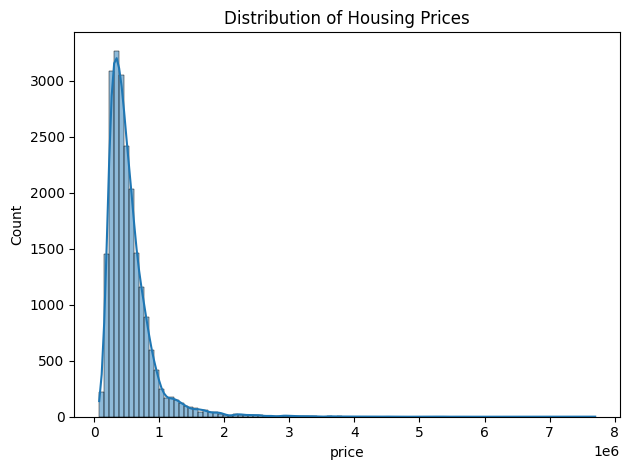

In [394]:
# Plot the distribution of the price
sns.histplot(df['price'],bins = 100, kde=True)

# Set the title of the plot 
plt.title('Distribution of Housing Prices')

# Show the plot
plt.tight_layout()
plt.show()


Then we grouped a set of categorical and ordinal and used a count plot to see frequency of each category and better understand frequency across different the categories.

From the graphs we can see:
- The distribution of views among is heavily skewed towards a rating of 0, suggesting that most properties do not have a quality view. A smaller number of properties have views rated at 2 or 3, while very few are rated at 1 or 4.
- Most houses are in generally in good or excellent condition as shown with a a concentration of rating at 3, a drop off to 4 and 5 and a very minimal amount of houses rated at 1 and 2.
- There is a somewhat bell-shaped distribution in the grades of houses, with the majority falling around grades 7 and 8, a decline just below this rating, and very few houses are graded as either excellent or poor, indicating that the condition of houses varies but is generally average.
- The great majority of houses have a 0 rating for the view, indicating that most houses are not directly adjacent to water.

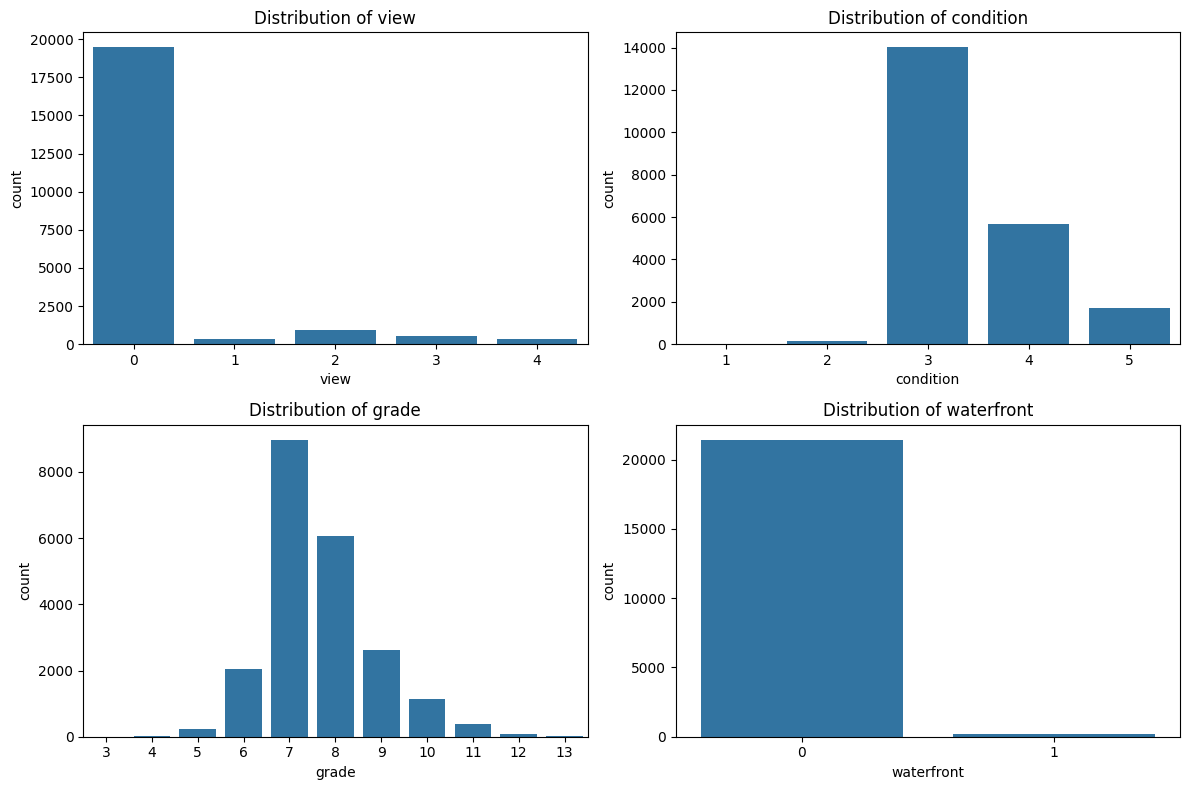

In [395]:
features = ['view', 'condition', 'grade', 'waterfront']

plt.figure(figsize=(12, 8))

for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i)  

    sns.countplot(x=df[feature])
    plt.title(f"Distribution of {feature}")
    
plt.tight_layout()
plt.show()


To continue, we looked at the distributions of various square footage metrics using a histogram again as it is more suitable for quantitative data.

From the graphs we can see:
- There is significant right skewness in the majority of the graphs, indicating that most properties have overall lower square footage values with some properties having much higher square footage. Given the right long tails is also indicates that there are outliers within the dataset.
  - Due to this a sort of transformation might be appropriate. (Applied in a later section).
- Generally all distributions all have similar shape, which may indicate that features considering living areas of the properties tend to scale together.
- The 'sqft_basement' graph has a spike at zero, which suggests that a significant number of properties do not have a basement. 
  - To get a better understanding of the distribution of those that do we can graph specifically filtering those properties that do not.
    - In doing so we can see that the size varies with fewer properties having bigger basements.


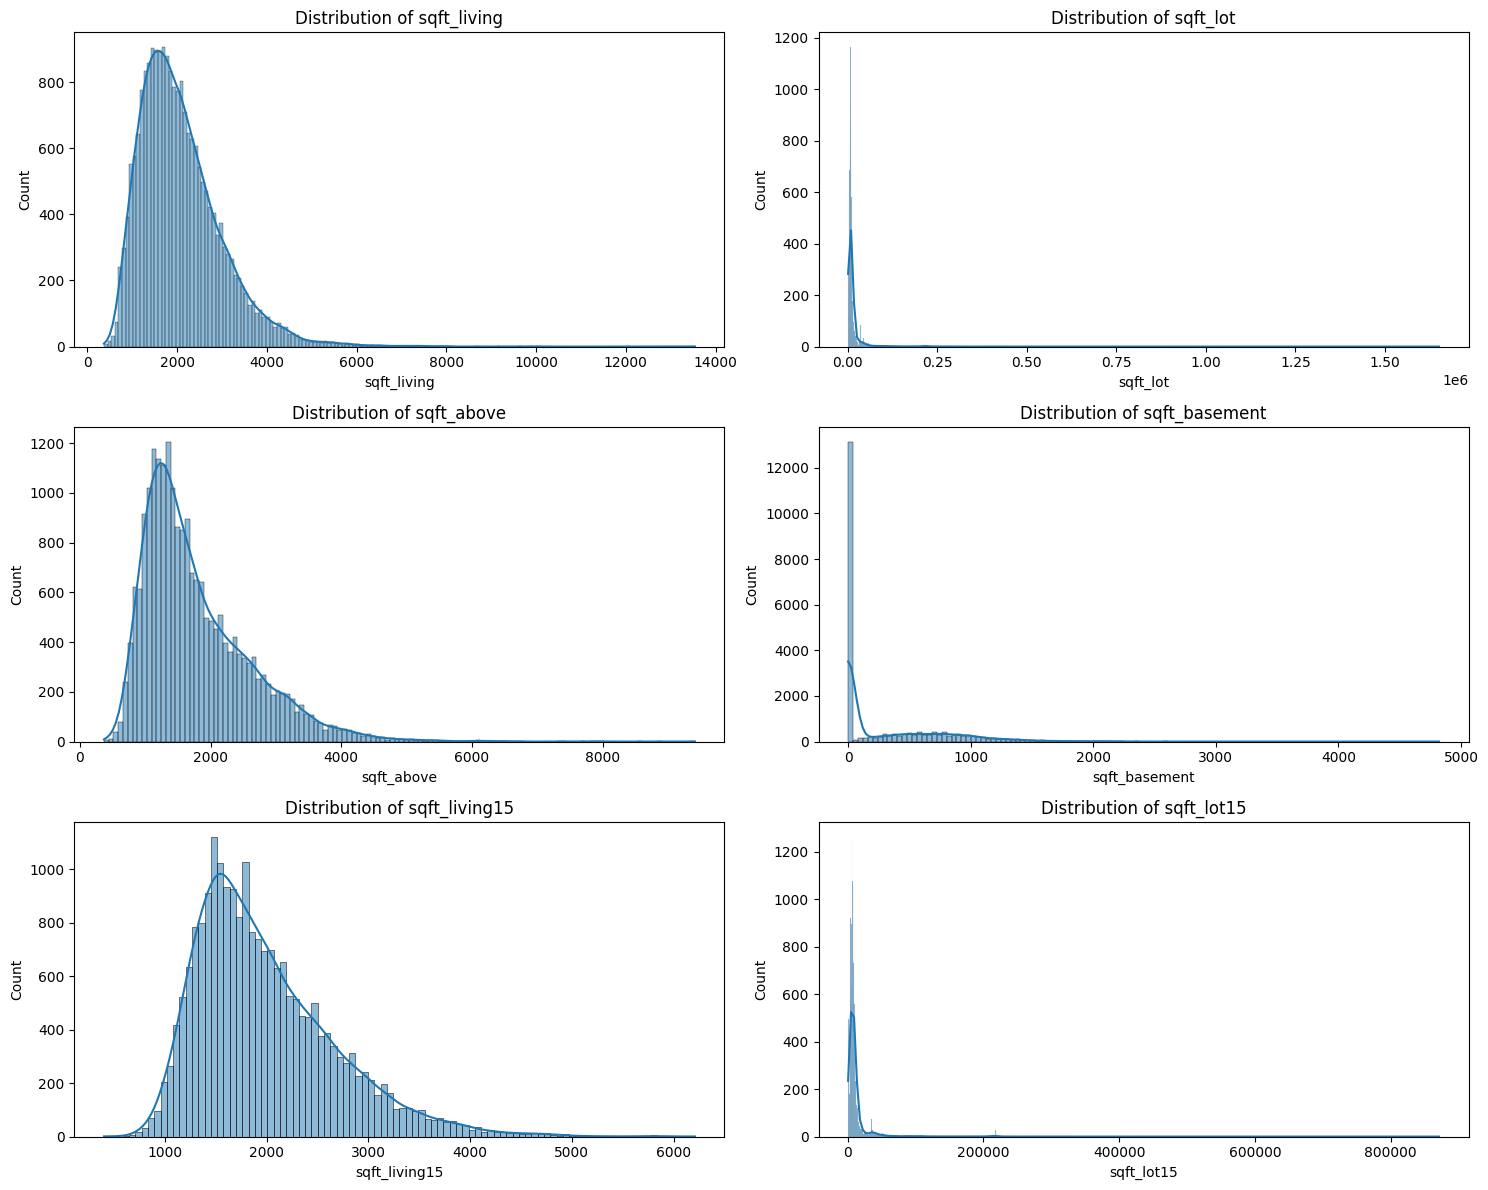

In [396]:
features = ['sqft_living', 'sqft_lot', 'sqft_above','sqft_basement', 'sqft_living15', 'sqft_lot15']

plt.figure(figsize=(15, 12))

for i, feature in enumerate(features, 1):
    plt.subplot(3, 2, i)
    sns.histplot(df[feature], kde=True)

    plt.title(f"Distribution of {feature}")

plt.tight_layout()
plt.show()

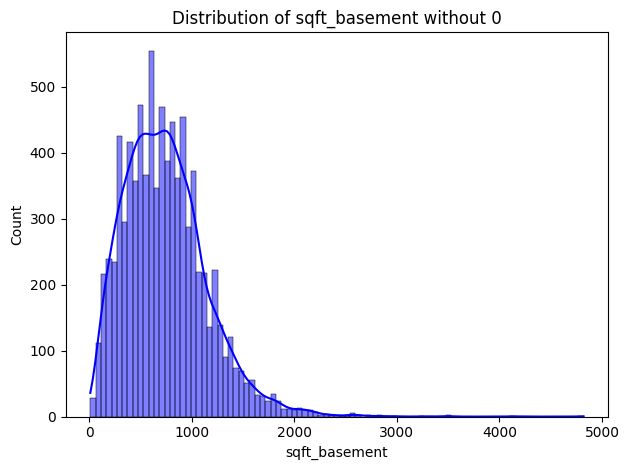

In [397]:
# Plot the histogram with kernel density estimation (kde)
sns.histplot(df[df['sqft_basement'] > 0]['sqft_basement'], color = "blue", kde=True)

# Set the title for the plot
plt.title('Distribution of sqft_basement without 0')

# Show the plot
plt.tight_layout()
plt.show()

Next, we looked at the distributions of various house feature, in doing so employing a count plot since they are discrete numeric values.


From the graphs we can see:
- The average number of bedrooms in a house is around 3 and 4, with a smaller number of houses having two or five bedrooms and fewer beyond that. Again the distribution is right-skewed with a long tail indicating the presence of outliers.
- The number of bathrooms per house varies with no distinct average although a majority are around two. The distribution is also right-skewed with a long tail indicating the presence of outliers.
- A significant number of houses have either one or two floors, with a small few having three floors and some with half-floor increments.

    
    


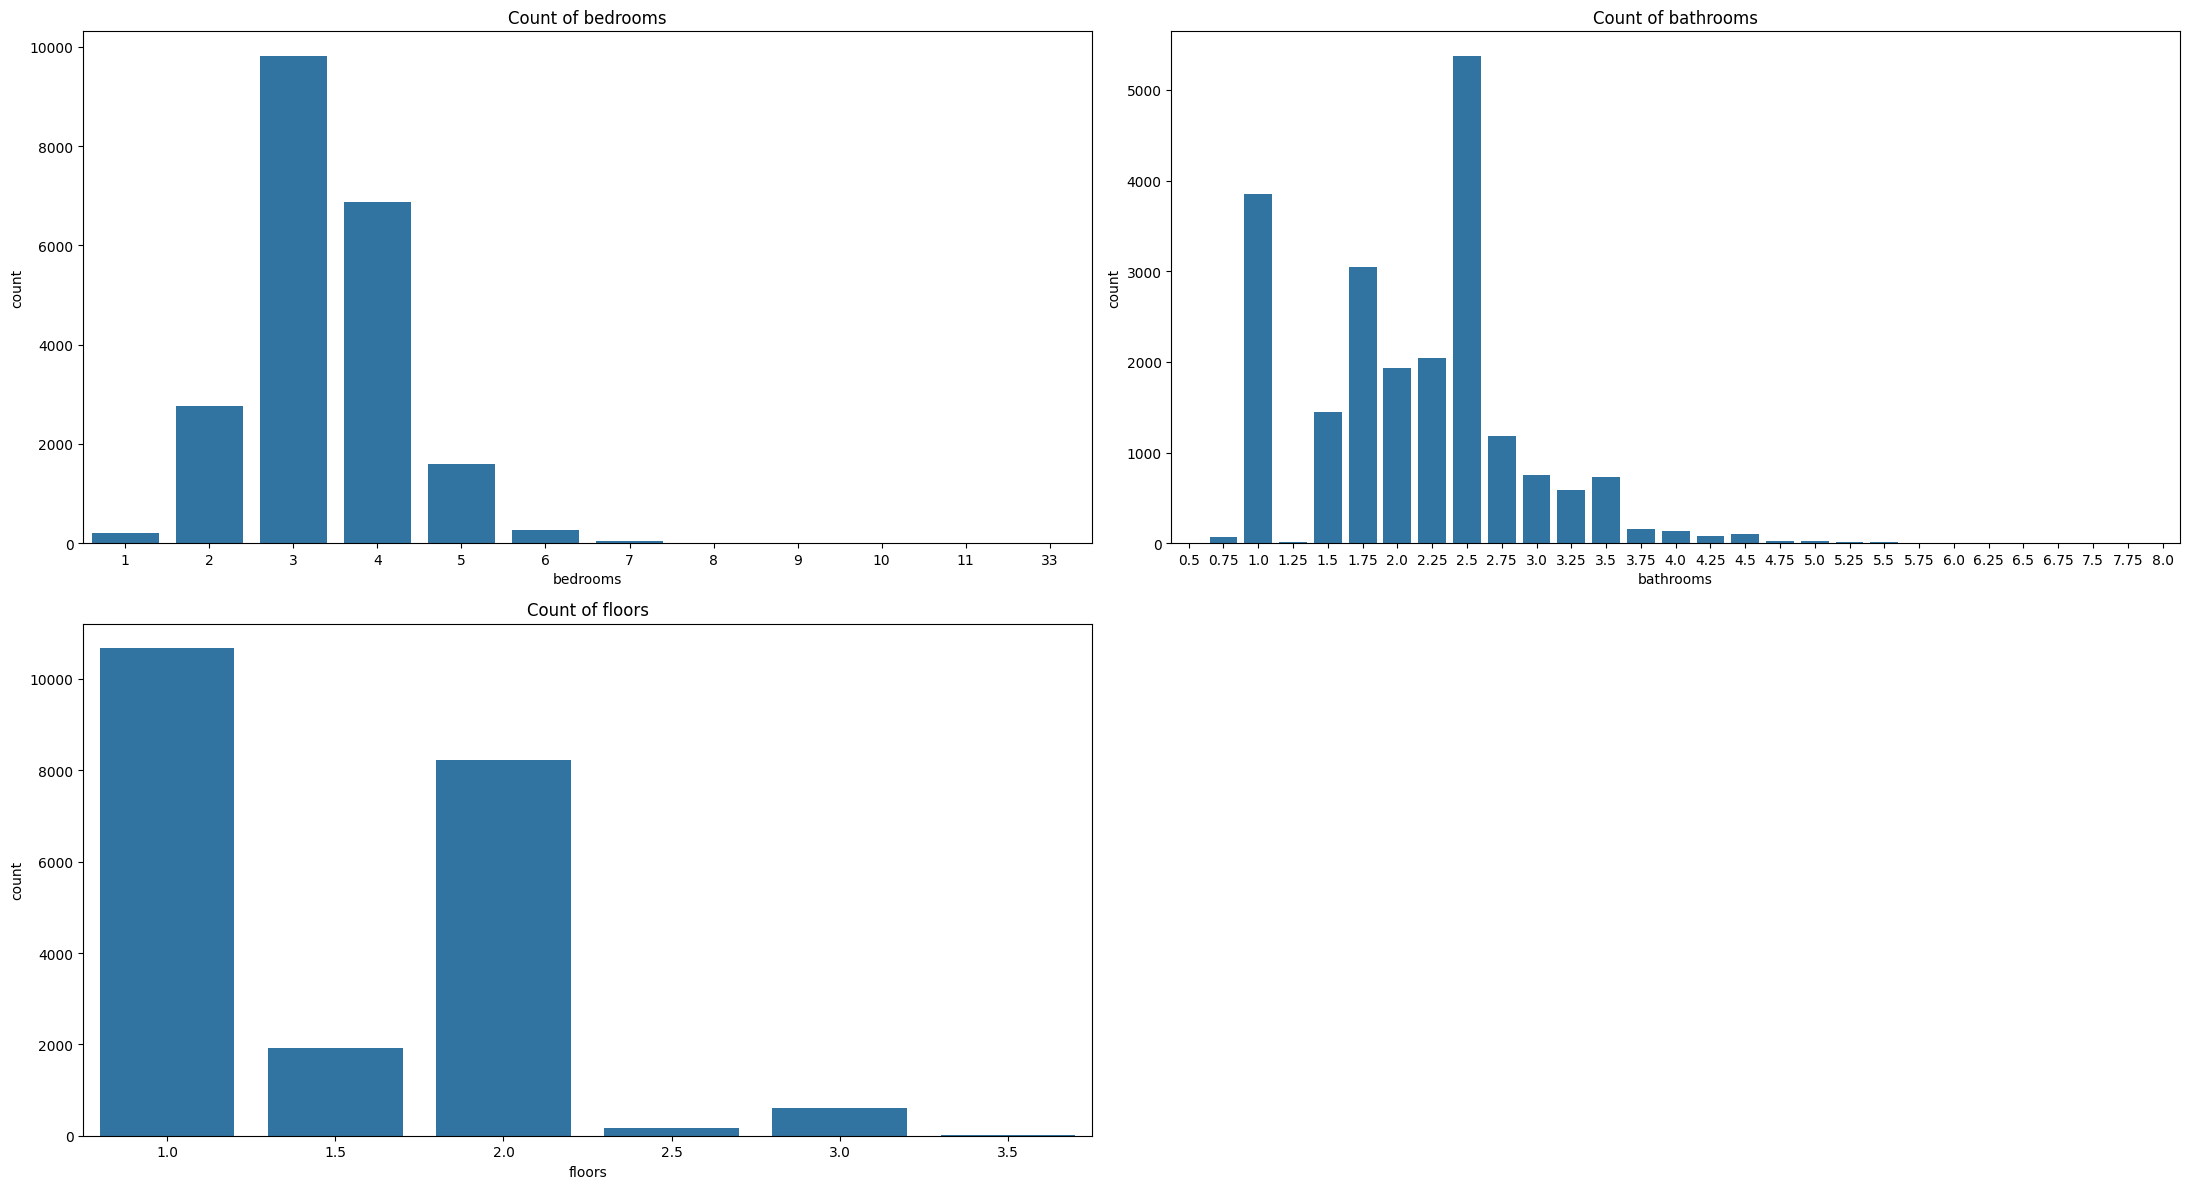

In [398]:
features = ['bedrooms', 'bathrooms', 'floors']

plt.figure(figsize=(22, 12))

for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i)
    sns.countplot(x=df[feature])
    plt.title(f"Count of {feature}")

plt.tight_layout()
plt.show()

To gain a better understanding of the ages of houses, we used histograms to look at the distribution of when they were built and when they underwent renovation.

- *Note:  When plotting the distribution of years of renovation, we encountered difficulties due to many houses having no renovation history, indicated by a value of 0. To address this issue, we removed all zero values to obtain a clearer picture.*

From the graphs we can see:
-  The majority of houses were constructed after approximately 1950.
-  A significant proportion of houses underwent renovation in later years which is expected due to the nature of renovation.

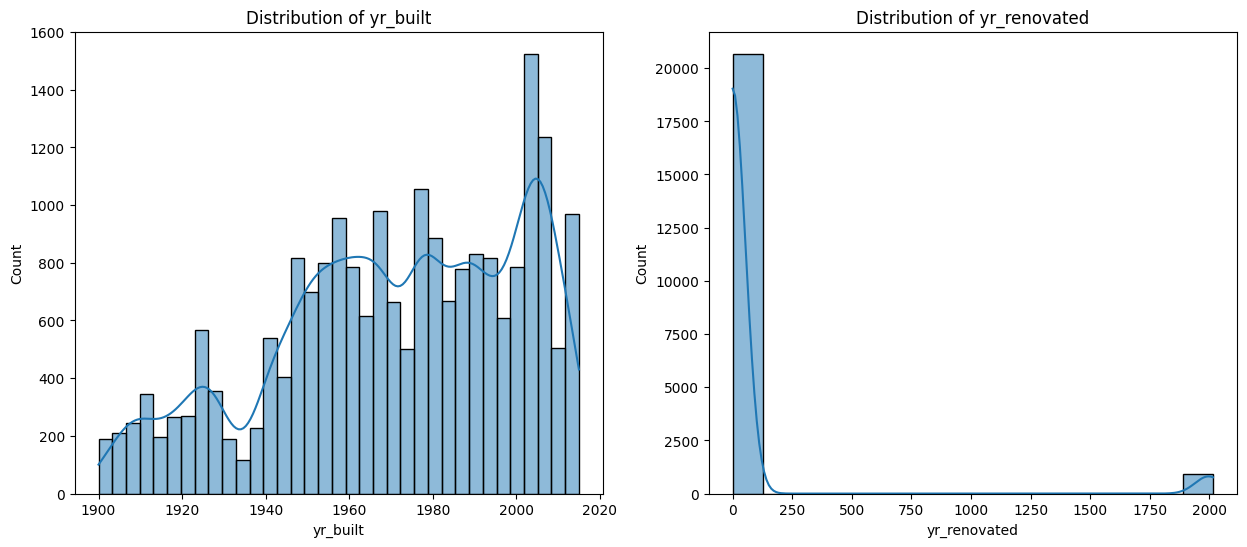

In [399]:
age_features = ['yr_built', 'yr_renovated']

plt.figure(figsize=(15, 6))

for i, age_feature in enumerate(age_features, 1):
    plt.subplot(1, 2, i) 

    sns.histplot(df[age_feature], kde=True)
    plt.title(f"Distribution of {age_feature}")
    

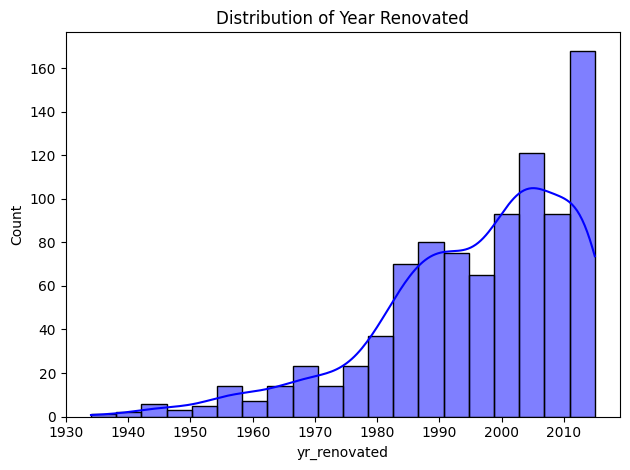

In [400]:
# Plot the histogram with kernel density estimation (kde)
sns.histplot(df[df['yr_renovated'] > 0]['yr_renovated'],  color='blue', kde=True)

# Set the title for the plot
plt.title('Distribution of Year Renovated')

# Show the plot
plt.tight_layout()
plt.show()

Lastly, we looked used a count plot to see a distribution of houses sold across different zipcode.


The chart shows a non-uniform distribution of houses sold indicating that certain areas (zip codes) have higher sales activity than others. This variability could be due to a magnitude of factors such as the availability of houses or desirability of certain neighborhoods.

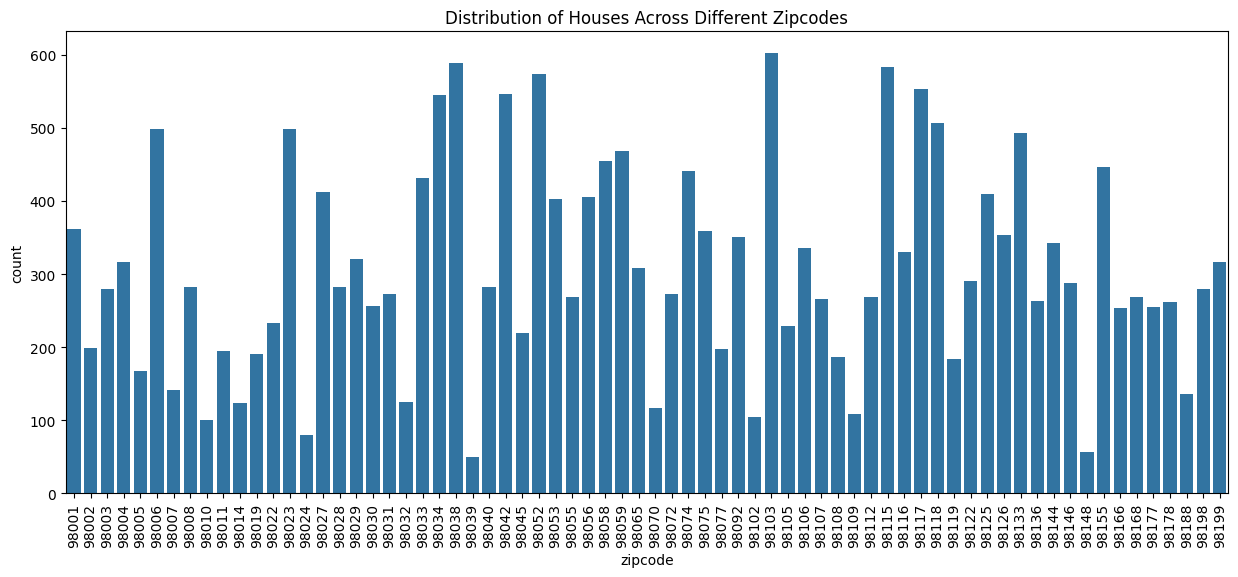

In [401]:
plt.figure(figsize=(15, 6))
sns.countplot(x='zipcode', data=df)
plt.title('Distribution of Houses Across Different Zipcodes')
plt.xticks(rotation=90)  
plt.show()

### **2.2 Data Transformation**

#### **2.2.1 Normalization**
Due to the nature of some of the features in our dataset being skewed its important to normalize these features to ensure a more balanced and accurate analysis since skewed data may lead to biases in models. To address this, we employed two key normalization techniques:
1. Log Scaling : Log scaling is a data normalization technique where in the logarithm function is applied to a chosen feature within a dataset and it effectively reduces the range of values by bringing larger values closer to the mean and making the overall distribution of the feature more symmetric and aligned.
2. IQR (Interquartile Range) : The Interquartile Range is a statistical  calculated by finding the difference between the 75th percentile (Q3) and the 25th percentile (Q1) of a the desired feature effectively representing the middle 50% of values further reducing skewness.

Initially we implemented log scaling for certain skewed features, upon analyzing the features again, we still noticed some skewed data and thought that appling the IQR for those features would be appropriate.

*Sources:*
1.  *https://developers.google.com/machine-learning/data-prep/transform/normalization*
2.  *https://www.tutorialspoint.com/how-to-use-pandas-filter-with-iqr*

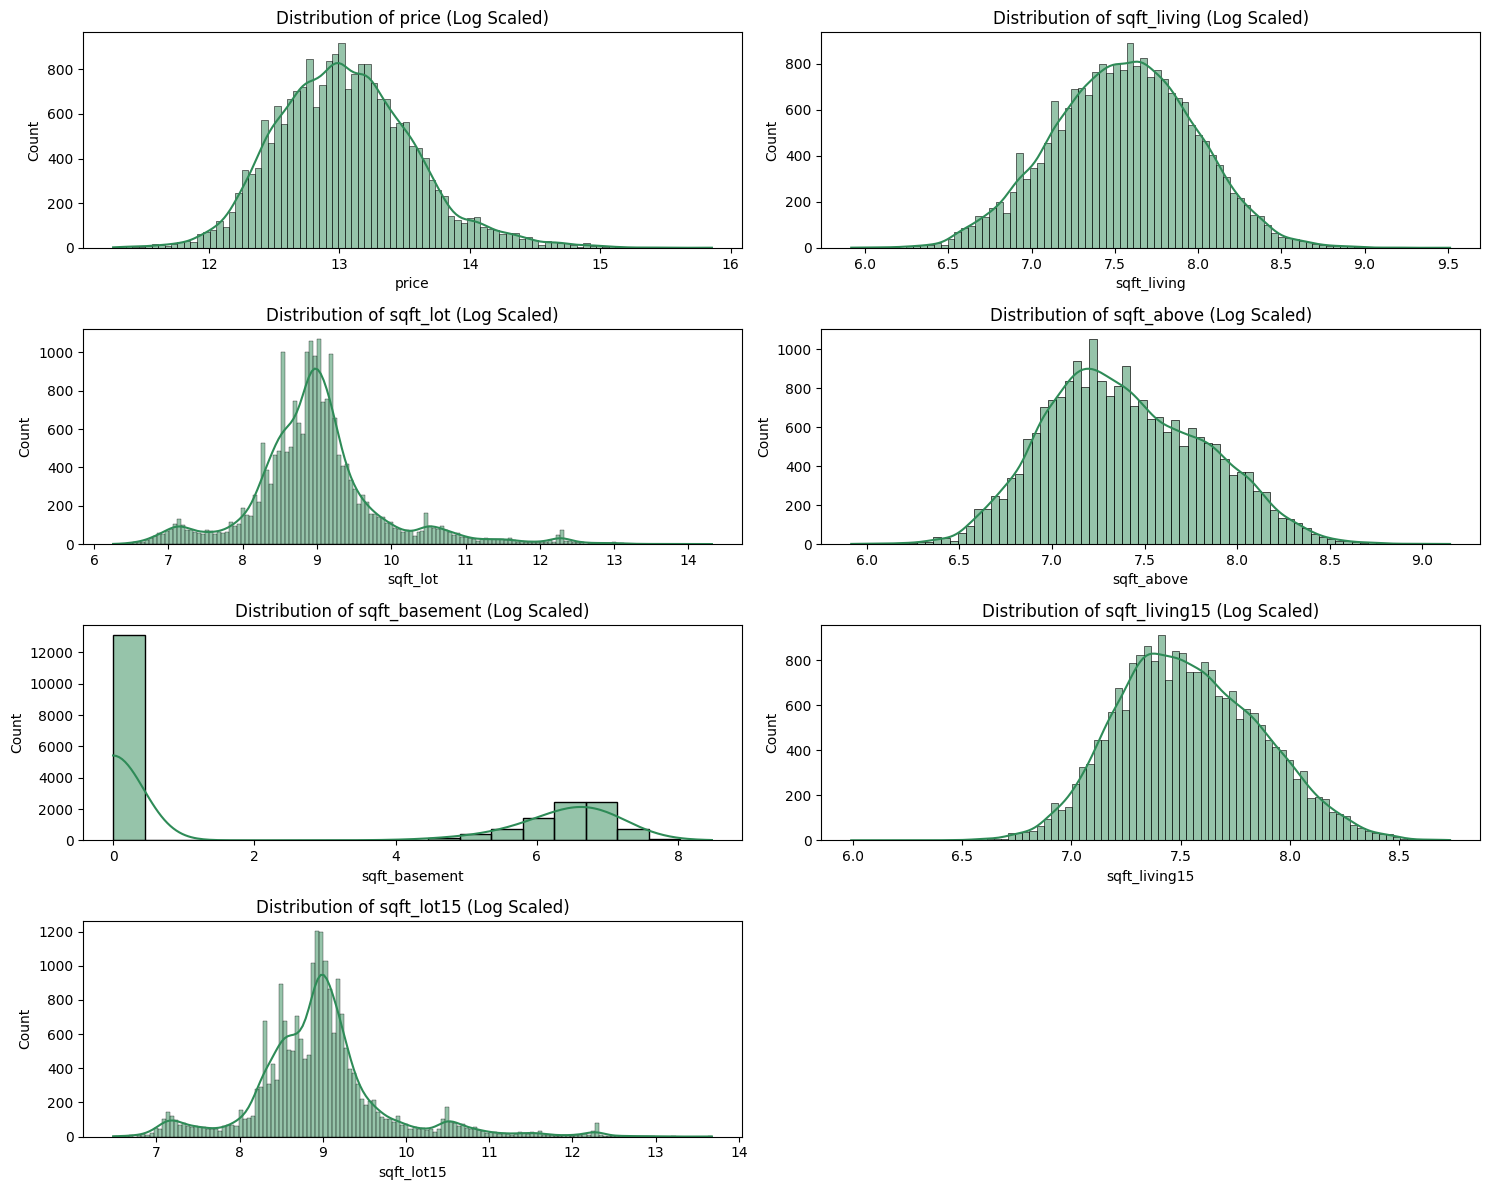

In [402]:
# Initialize a list of features to normalize with log scaling
features_log_scaled = ['price', 'sqft_living', 'sqft_lot', 'sqft_above','sqft_basement', 'sqft_living15', 'sqft_lot15']

# Iterate over the features_log_scaled and and apply log scaling to each fea
for feature in features_log_scaled:
    df[feature] = np.log1p(df[feature])

# Plot the histograms for the normalized features
plt.figure(figsize=(15, 12))

for i, feature in enumerate(features_log_scaled, 1):
    plt.subplot(4, 2, i)
    sns.histplot(df[feature], color='seagreen', kde=True)
    plt.title(f"Distribution of {feature} (Log Scaled)")

plt.tight_layout()
plt.show()

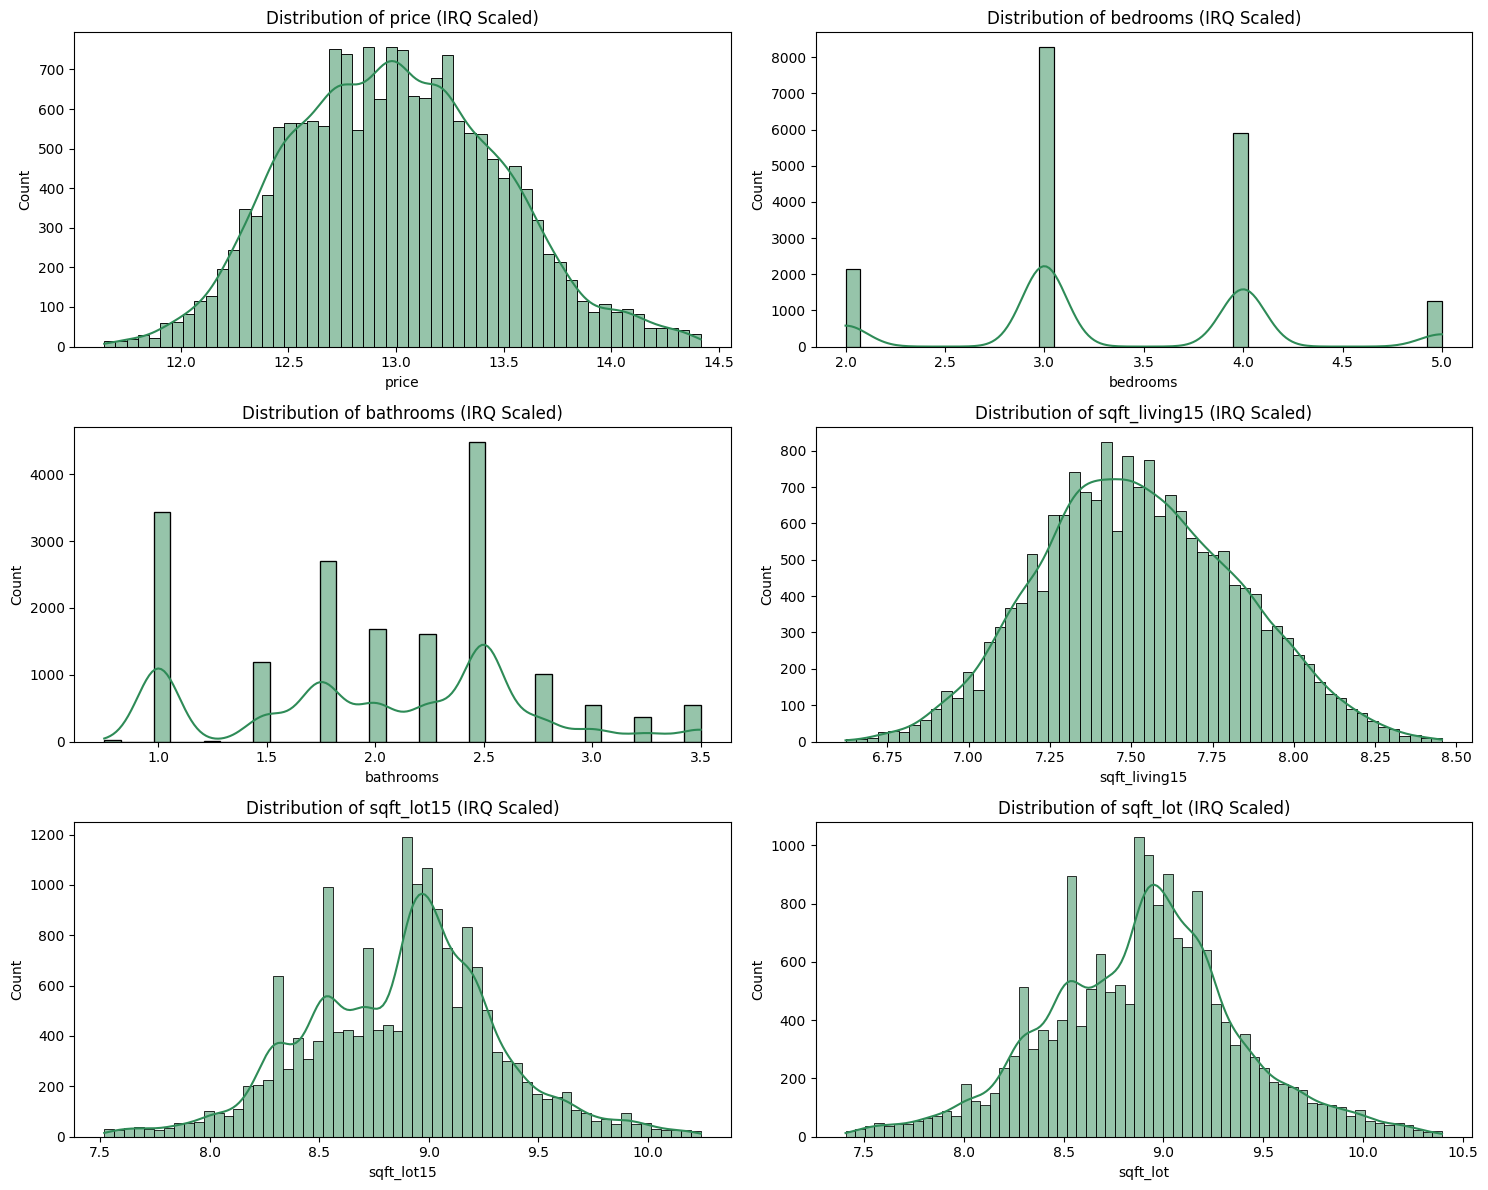

In [403]:
# Initialize a list of features to normalize with IQR
# Note 'sqft_living' is further scaled since it is a bit skewed
features = ['price', 'bedrooms', 'bathrooms', 'sqft_living15', 'sqft_lot15', 'sqft_lot']

# Calculate Q1, Q3, and IQR only for the selected features
Q1 = df[features].quantile(0.25)
Q3 = df[features].quantile(0.75)
IQR = Q3 - Q1

# Find the outliers using the previously calculated IQR
outliers = (df[features] < (Q1 - 1.5 * IQR)) | (df[features] > (Q3 + 1.5 * IQR))

# Filter out the outliers
df = df[~outliers.any(axis=1)]

# Plot the histograms for the normalized features
plt.figure(figsize=(15, 12))

for i, feature in enumerate(features, 1):
    plt.subplot(3, 2, i)
    sns.histplot(df[feature], color='seagreen', kde=True)
    plt.title(f"Distribution of {feature} (IRQ Scaled)")

plt.tight_layout()
plt.show()

In [404]:
# Get the length of the dataframe before removing outliers
len(df)


17586

#### **2.2.2 Feature Engineering**
Feature engineering will allow us to enhance the predictive power of the models allowing us to see more underlying patterns and relationships that are not immediately apparent. Solely looking at the features and based off domain knowledge we can create new features that might have potential correlation associated with the target home sale price.

1. **Overall House Age - The total age of the house calculated from its construction year to the year of sale**
    - Possible Significance : Older homes might be valued less than newer ones due to their overall build and condition.
    <br></br>

2. **Relative House Age - The relative age of the house based off renovations if any. If there are no renovations the house age is its overall age**
    - Possible Significance : Recent renovations might enhance a house's perceived age and potentially increase its value.
    <br></br>

3. **Renovation Indicator - A binary indicator that reflects whether any renovation has occurred.**
   - Possible Significance : Renovated houses might be more attractive and valued higher than ones that are not.
    <br></br>

4. ~~**Price Per Sqaure Foot Living - The price per square foot for the living area.**~~
5. ~~**Price Per Square Foot Lot - The price per square foot for the living area.**~~
   - ~~Possible Significance :  The value of a home is often estimated based on its price per square foot.~~
    <br></br>

6. **Bathroom-to-Bedroom - The ratio of bathrooms to bedrooms can indicate the level of comfort and convenience in a house.**
   - Possible Significance : A higher bathroom-to-bedroom ratio may signify convenience and a nicer house which may influence price
    <br></br>

In [405]:
# Copy the main dataframe to a new dataframe for the first set of engineered features
df_engineered_1 = df.copy()

# Calculate the age of the house based on the year it was built and the date it was sold
df_engineered_1['overall_house_age'] = df_engineered_1['date'].dt.year - df_engineered_1['yr_built']

# Calculate the age of renovation based on the year it was renovated and the date the house was sold
# If the house was never renovated set the renovation age to the the overall house age
df_engineered_1['relative_house_age'] = df_engineered_1['date'].dt.year - df_engineered_1['yr_renovated']
df_engineered_1.loc[df_engineered_1['yr_renovated'] == 0, 'relative_house_age'] = df_engineered_1['overall_house_age']

# Create a binary indicator to determine if the house was renovated or not
df_engineered_1['has_renovated'] = df_engineered_1['yr_renovated'].apply(lambda x: 1 if x > 0 else 0)

# # Calculate the price per square foot for living space
# df_engineered_1['price_per_sqft_living'] = df_engineered_1['price'] / df_engineered_1['sqft_living']

# # Calculate the price per square foot for the lot
# df_engineered_1['price_per_sqft_lot'] = df_engineered_1['price'] / df_engineered_1['sqft_lot']

# Calculate the ratio of bathrooms to bedrooms
df_engineered_1['bath_bed_ratio'] = df_engineered_1['bathrooms'] / df_engineered_1['bedrooms']

# Edge Case : Handle some properties that have bathrooms without bedrooms in which results a 'inf' ratio 
df_engineered_1['bath_bed_ratio'] = df_engineered_1['bath_bed_ratio'].replace([np.inf, -np.inf], np.nan).fillna(0)

# Print the first few rows of the new dataframe
df_engineered_1.head()


date      price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0 2014-10-13  12.309987         3       1.00     7.074117  8.639588     1.0   
1 2014-12-09  13.195616         3       2.25     7.852050  8.887791     2.0   
2 2015-02-25  12.100718         2       1.00     6.647688  9.210440     1.0   
3 2014-12-09  13.311331         4       3.00     7.581210  8.517393     1.0   
4 2015-02-18  13.142168         3       2.00     7.427144  8.997271     1.0   

   waterfront  view  condition  grade  sqft_above  sqft_basement  yr_built  \
0           0     0          3      7    7.074117       0.000000      1955   
1           0     0          3      7    7.682943       5.993961      1951   
2           0     0          3      6    6.647688       0.000000      1933   
3           0     0          5      7    6.957497       6.814543      1965   
4           0     0          3      8    7.427144       0.000000      1987   

   yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  \
0             0    98178  47.5112 -122.257       7.201171    8.639588   
1          1991    98125  47.7210 -122.319       7.433075    8.941153   
2             0    98028  47.7379 -122.233       7.908755    8.995041   
3             0    98136  47.5208 -122.393       7.215975    8.517393   
4             0    98074  47.6168 -122.045       7.496097    8.923191   

   overall_house_age  relative_house_age  has_renovated  bath_bed_ratio  
0                 59                  59              0        0.333333  
1                 63                  23              1        0.750000  
2                 82                  82              0        0.500000  
3                 49                  49              0        0.750000  
4                 28                  28              0        0.666667

In [406]:
# Double checking missing and infinite values

# Count missing values per column
missing_data = df_engineered_1.isnull().sum()

# Count infinite values per column (due to edge case)
inf_data = df_engineered_1.isin([np.inf, -np.inf]).sum()

# Combine counts of missing and infinite values
total_issues = missing_data + inf_data

# Display the combined counts
print(total_issues)


date                  0
price                 0
bedrooms              0
bathrooms             0
sqft_living           0
sqft_lot              0
floors                0
waterfront            0
view                  0
condition             0
grade                 0
sqft_above            0
sqft_basement         0
yr_built              0
yr_renovated          0
zipcode               0
lat                   0
long                  0
sqft_living15         0
sqft_lot15            0
overall_house_age     0
relative_house_age    0
has_renovated         0
bath_bed_ratio        0
dtype: int64


#### **2.2.3 Preliminary Correlation Matrix**

After feature engineering, to gain insight into how the features are correlated in the current state of the data we created a correlation matrix represented by a heatmap. In doing so we can begin to see relationships between house features and price, and also examine the interdependence of features. Furthermore, we can analyze it based on domain knowledge and identify any potential gaps where there might be a correlation that is not immediately apparent.

The independent/explanatory variable are attributes of the home. The dependent variable is the one we're trying to predict, which is the price. If two independent variables have almost a correlation close to 1 or -1, such as the sqft_above and sqft_living, we don't get much better predictions from the second because they measure similar factors, such as the size of the property.

*Note: A detailed analysis is performed in subsequent blocks but this is used initially to get an idea of the data*

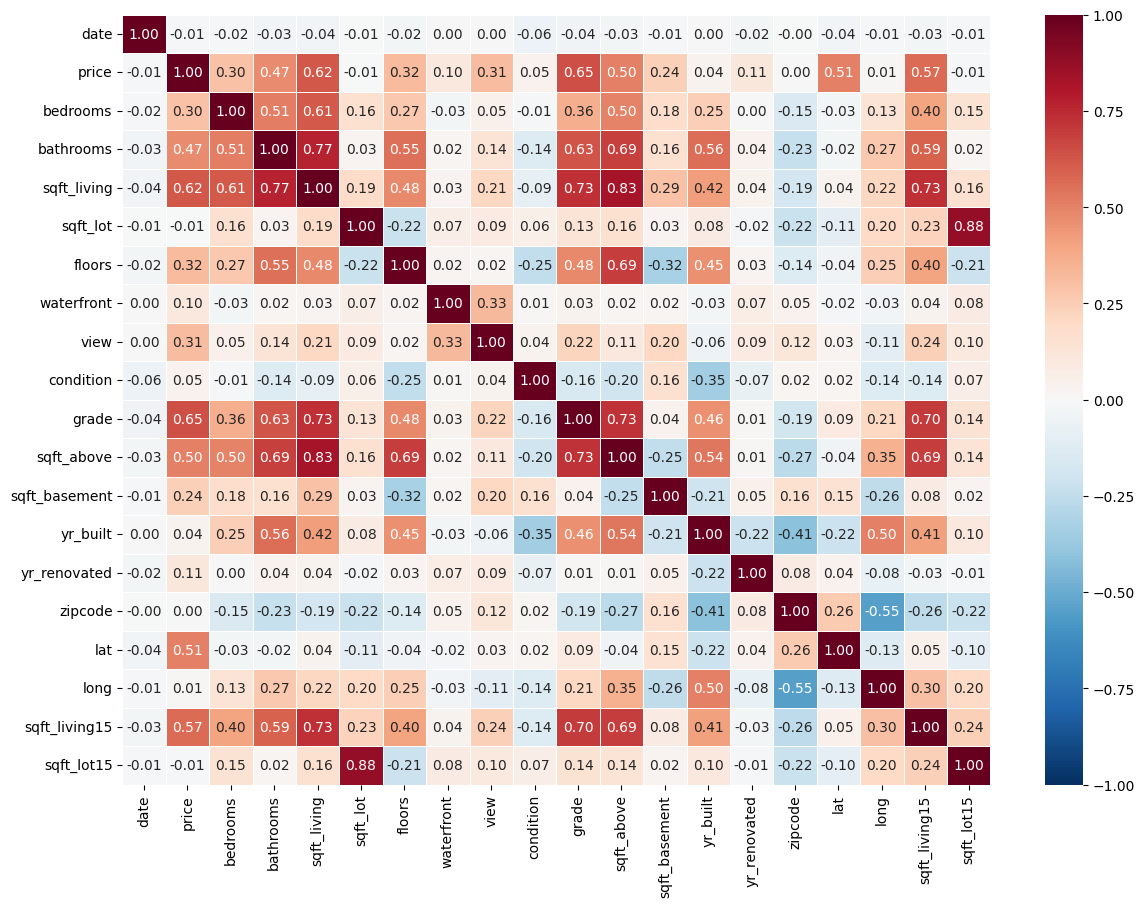

In [407]:
# Initialize the correlation matrix for the dataframe
corr = df.corr()

# Adjust the figure size
plt.figure(figsize=(14,10))

# Create a to visualize the correlation matrix
sns.heatmap(corr, annot=True, cmap="RdBu_r", vmin = -1, vmax= 1, fmt=".2f", linewidth=0.5)

plt.show()

#### **2.2.2 Removing Redundant Features**

After feature engineering and preliminary correlation analysis, we found it may be important to identify and eliminate features that have become redundant due to them being represented through or better by other new features. We noticed some features also offer minimal value in predicting house prices and are highly correlated with one another and can be dropped. This simplification of the dataset allows us to focus on more smaller scope and possibly allow us to see more impactful variables.

In [408]:
# Make a copy of the engineered dataframe
df_reduced_1 = df_engineered_1.copy()

# Drop 'yr_buit' and 'yr_renovated' since we have have 'relative_house_age' 
df_reduced_1 = df_reduced_1.drop(['yr_built', 'overall_house_age'], axis=1)

# Drop 'yr_renovated' since we have 'has_renovated'
df_reduced_1 = df_reduced_1.drop(['yr_renovated'], axis=1)

# Drop 'sqft_above' and since we have 'sqft_living' and it is highly correlated with 'sqft_above'
df_reduced_1 = df_reduced_1.drop(['sqft_above'], axis=1)

# Drop 'sqft_basement' and since we have 'sqft_living'
df_reduced_1 = df_reduced_1.drop(['sqft_basement'], axis=1)

# # Drop 'date' since its not relevant 
df_reduced_1 = df_reduced_1.drop(['date'], axis=1)

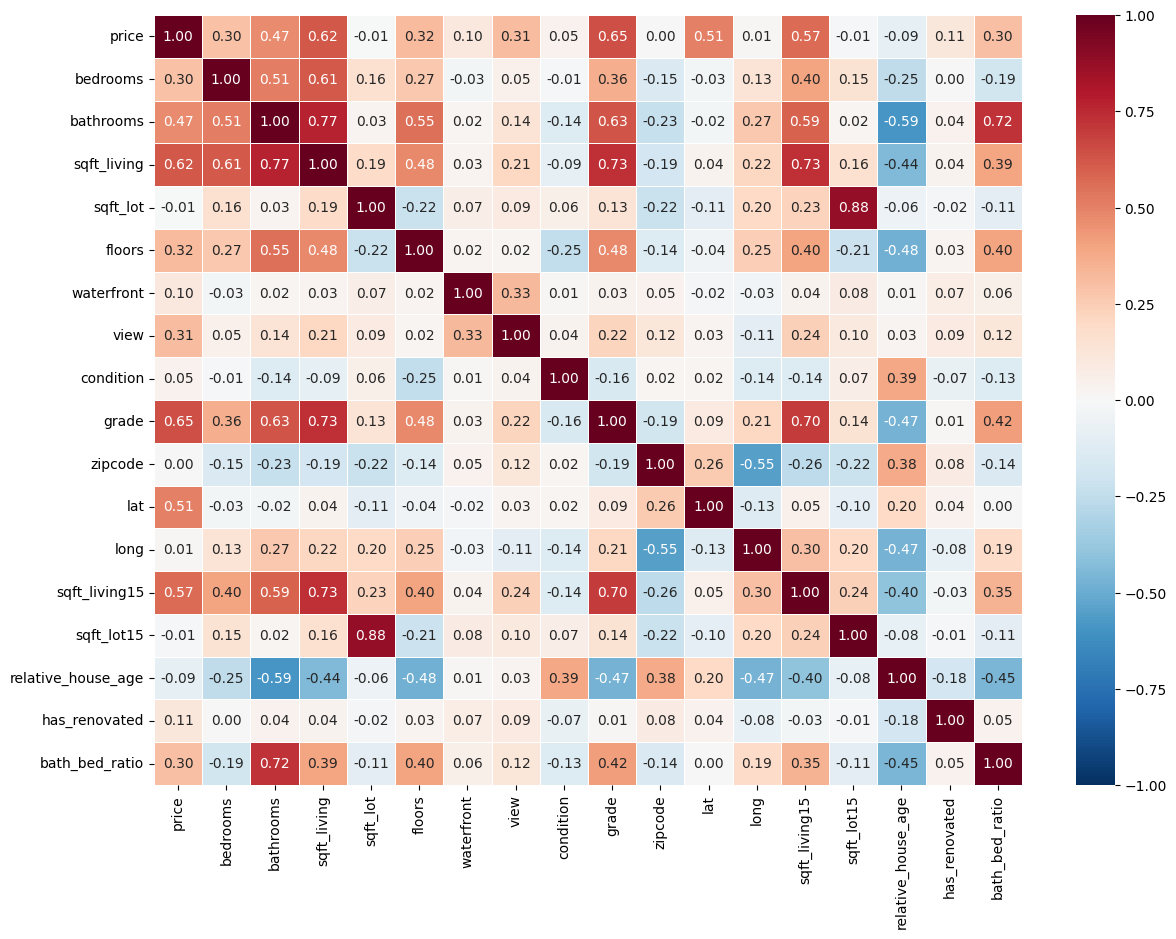

In [409]:
# Check the correlation matrix again with the removed features
# Initialize the correlation matrix for the dataframe
corr = df_reduced_1.corr()

# Adjust the figure size
plt.figure(figsize=(14,10))

# Create a to visualize the correlation matrix
sns.heatmap(corr, annot=True, cmap="RdBu_r", vmin = -1, vmax= 1, fmt=".2f", linewidth=0.5)

plt.show()

#### **2.2.3 More Feature Engineering (Location Specific)**

Upon analyzing the correlation matrix we observed a noticeable correlation between latitude and price, although interestingly, longitude does not have a similar correlation. Furthermore, there appears to be minimal correlation between zip code and price, which was interesting considering that based off domain knowledge, location influences price.

To further explore this we utilized latitude and longitude coordinates to create plots in relation to price along with referencing the actual geographical map for cities, geography and landmark in hope to better understanding of the spatial context.

Additionally to deal with the zip codes, we performed an aggregation of house features based on zip codes to aim to reveal any hidden correlations between zip code areas and house prices.

In doing so we can see:
- There is a concentration of high-priced properties in specific areas, such as Seattle, Bellevue and Mercer Island. As you move away from these areas, there is a general decrease in house prices, particularly noticeable when going south. This observation may explain the higher correlation observed with latitude.
- In creating aggregated features in relation to zipcode by calculating the mean values of various attributes such as the number of bedrooms, bathrooms, sqf_living etc we were able to create average housing characteristics of a given zipcode which allows us to draw better correlation to price.

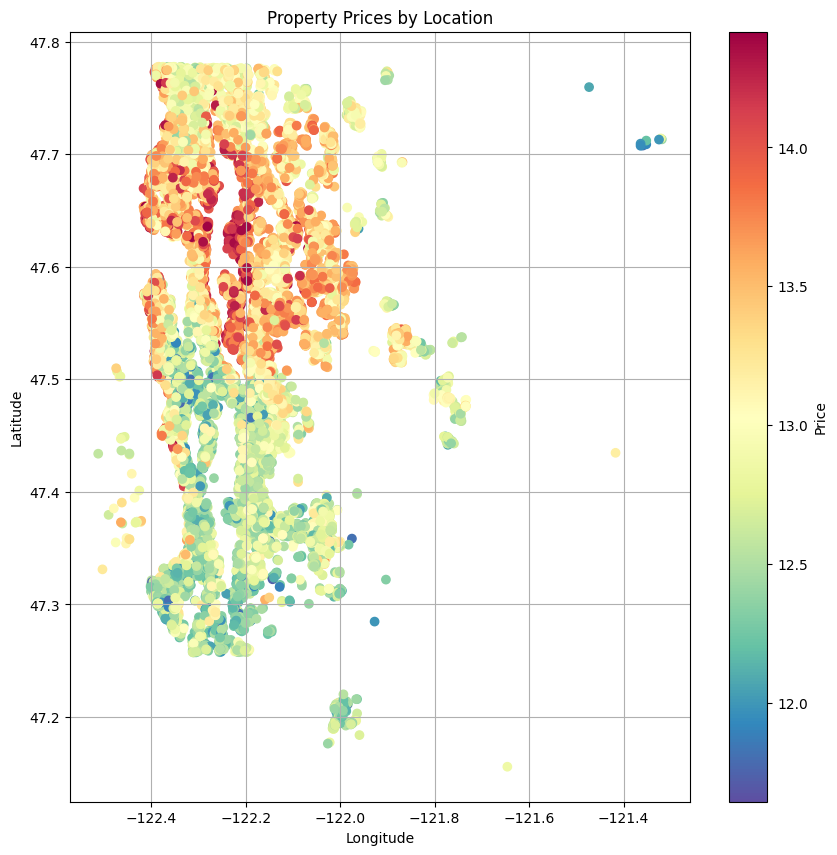

In [410]:
# In
plt.figure(figsize=(10, 10))

# Create a scatter plot with longitude on the x-axis and latitude on the y-axis
# The color of the points represents the price
scatter = plt.scatter(df_reduced_1['long'], df_reduced_1['lat'], c=df_reduced_1['price'], cmap='Spectral_r', alpha=1, edgecolor=None)

# Adding titles and labels
plt.title('Property Prices by Location')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Adding a color bar to represent price
plt.colorbar(scatter, label='Price')

plt.grid(True)
plt.show()


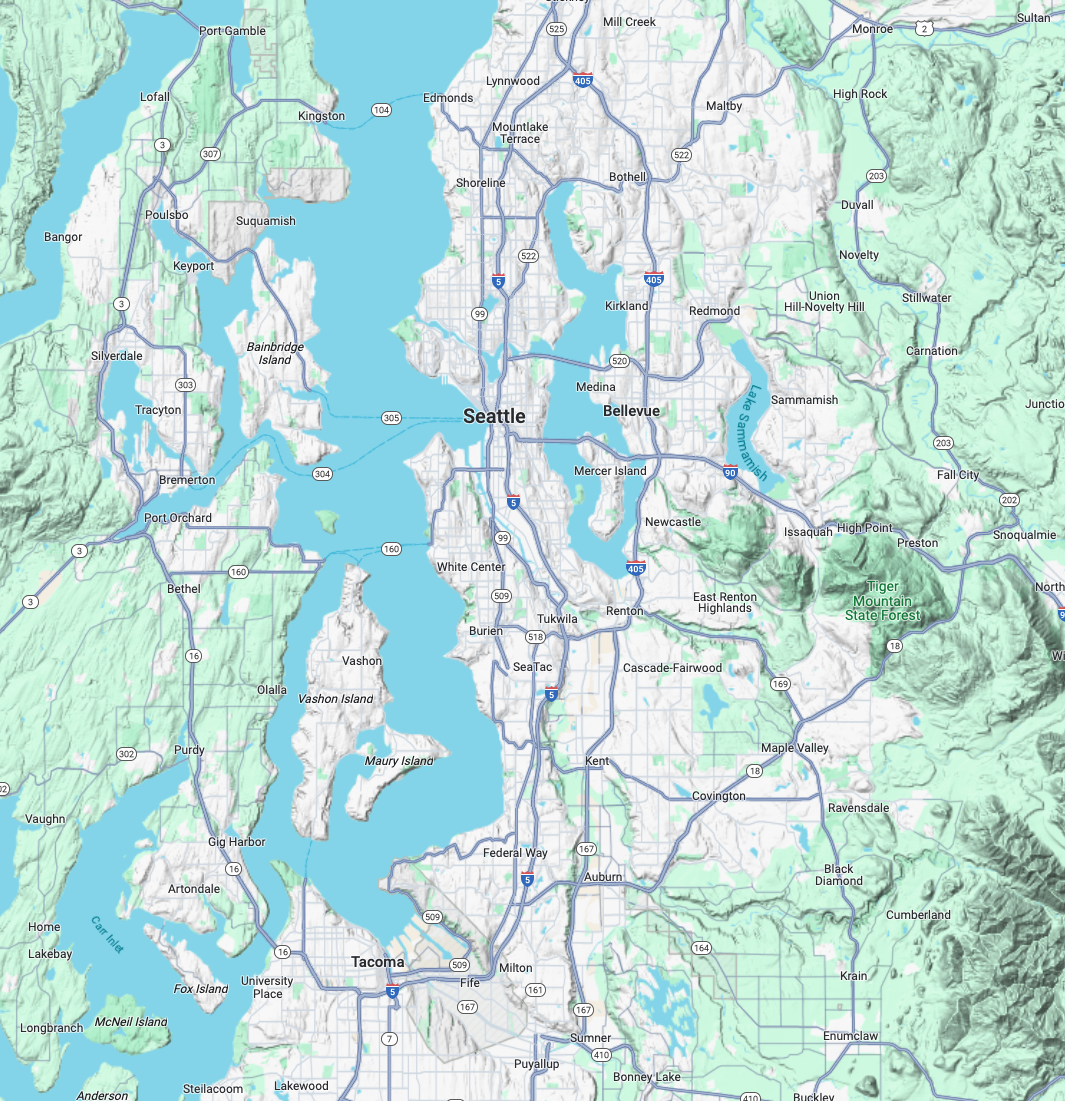

In [411]:
# Create a copy of the reduced dataframe
df_engineered_2 = df_reduced_1.copy()

zipcode_stats = df_engineered_2.groupby('zipcode').mean()

zipcode_stats = zipcode_stats[['bedrooms', 'bathrooms', 'sqft_living', 'grade', 'condition', 'bath_bed_ratio', 'sqft_living15', 'sqft_lot15', 'floors']].reset_index()

zipcode_stats.columns = [
    'zipcode',
    'zipcode_bedrooms_mean',
    'zipcode_bathrooms_mean',
    'zipcode_sqft_living_mean',
    'zipcode_grade_mean',
    'zipcode_condition_mean',
    'zipcode_bath_bed_ratio_mean',
    'zipecode_sqft_living15_mean',
    'zipcode_sqft_lot15_mean',
    'zipcode_floor_mean'
]

df_engineered_2 = df_engineered_2.merge(zipcode_stats, on='zipcode', how='left')

df_engineered_2[['bedrooms', 'bathrooms', 'sqft_living', 'grade', 'condition', 'bath_bed_ratio', 'sqft_living15', 'sqft_lot15', 'floors']].head()


bedrooms  bathrooms  sqft_living  grade  condition  bath_bed_ratio  \
0         3       1.00     7.074117      7          3        0.333333   
1         3       2.25     7.852050      7          3        0.750000   
2         2       1.00     6.647688      6          3        0.500000   
3         4       3.00     7.581210      7          5        0.750000   
4         3       2.00     7.427144      8          3        0.666667   

   sqft_living15  sqft_lot15  floors  
0       7.201171    8.639588     1.0  
1       7.433075    8.941153     2.0  
2       7.908755    8.995041     1.0  
3       7.215975    8.517393     1.0  
4       7.496097    8.923191     1.0

*Note: Previously dropped 'lat' and 'long' since we had zip code based features although through iteration it was determined that these might actually be a pretty valuable feature*

In [412]:
# Create a copy of the dataframe
df_reduced_2 = df_engineered_2.copy()

# Drop 'zipcode', 'lat' and 'long' since we have zipcode based features
df_reduced_2 = df_reduced_2.drop(['zipcode'], axis=1)

# # Drop lat and long since we have zipcode based features
# df_reduced_2 = df_reduced_2.drop(['lat', 'long'], axis=1)

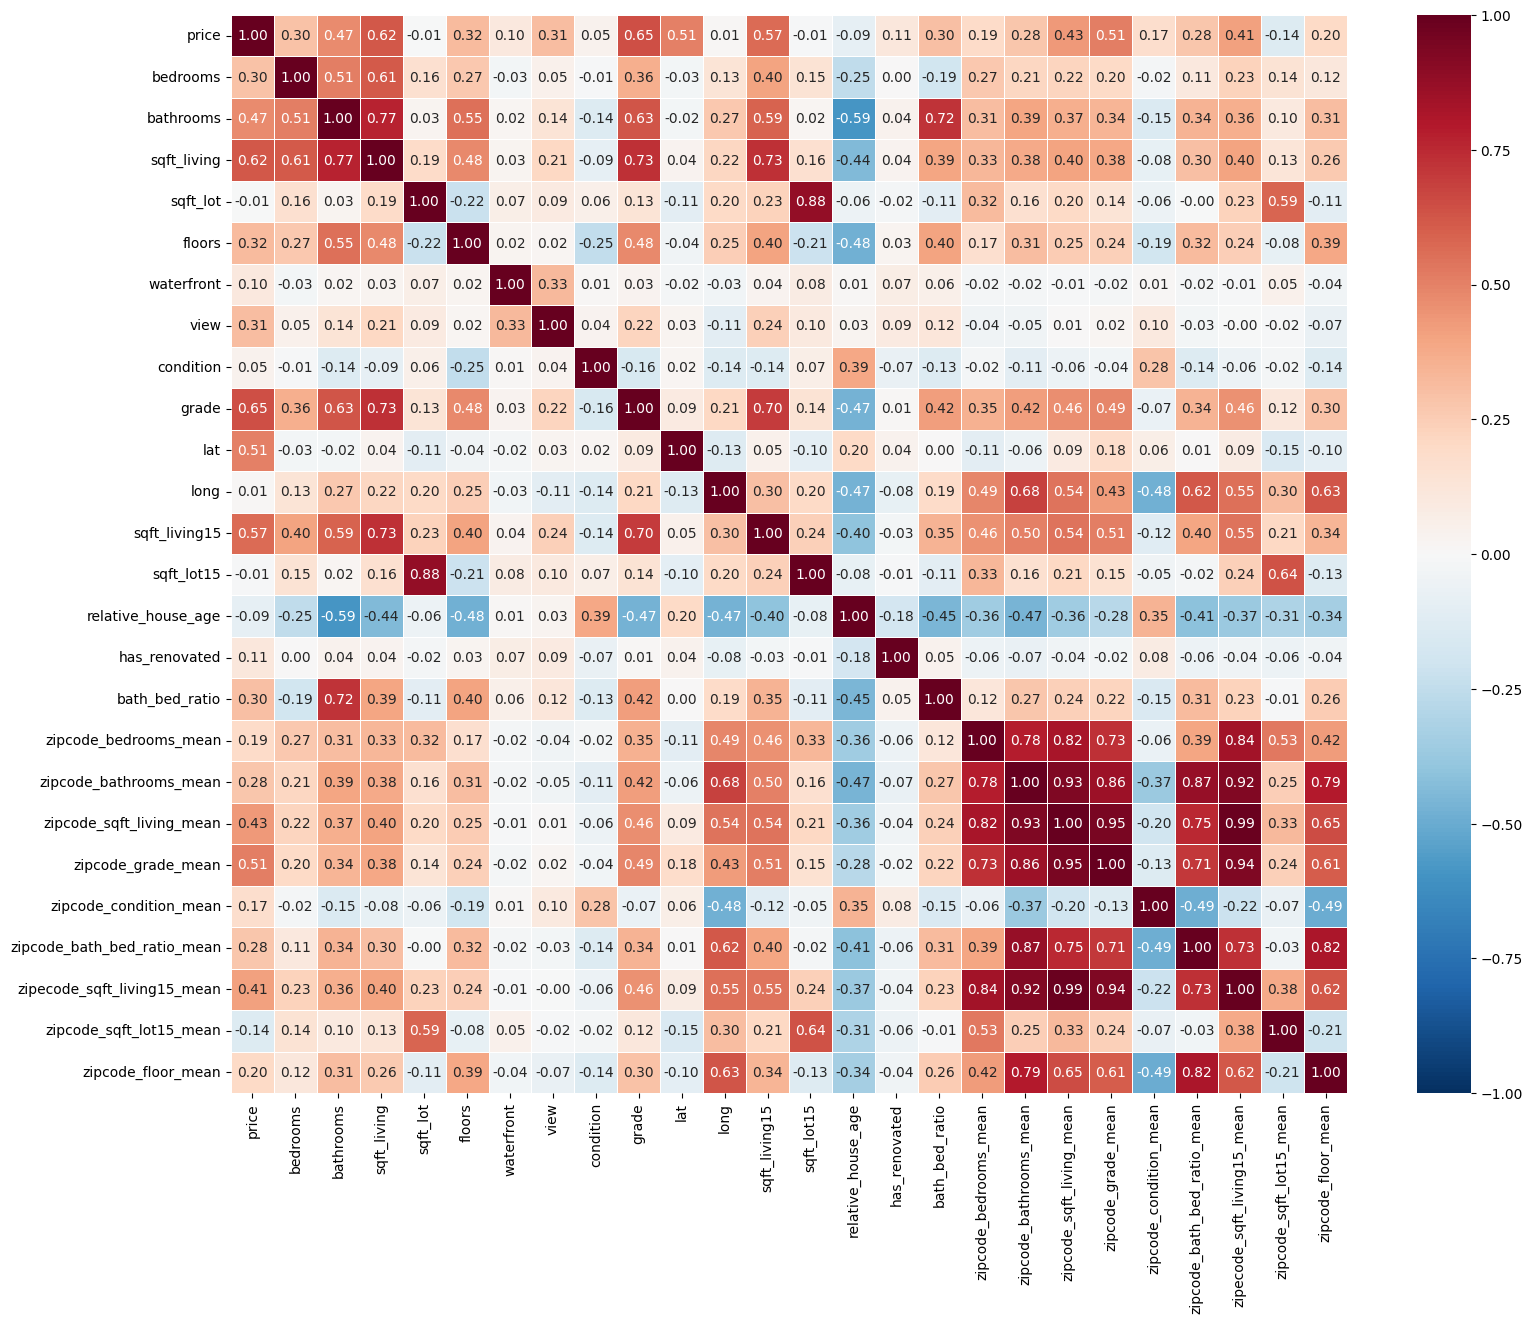

In [413]:
# Initialize the correlation matrix for the dataframe
corr = df_reduced_2.corr()

# Adjust the figure size
plt.figure(figsize=(18,14))

# Visualize the correlation matrix
sns.heatmap(corr, annot=True, cmap="RdBu_r", vmin = -1, vmax= 1, fmt=".2f", linewidth=0.5)

plt.show()

In [414]:
# Intialize a final dataframe that is cleaned and engineered data to use for modeling
df_final = df_reduced_2.copy()

# Identigy highly correlated features to keep in a list
high_corr_features = ['bahtrooms', 'sqft_living', 'grade', 'lat', 'sqft_living15', 'zipcode_sqft_living_mean' 'zipcode_grade_mean', 'zipecode_sqft_living15_mean']

medium_corr_features = ['sqft_lot', 'sqft_lot15', 'zipcode_sqft_lot15_mean']

### **2.3 Correlation Analysis and Identifying Dependent and Independent Features**

With the final correlation matrix we can draw the following:

- **High Correlation with Price:** 
  - Features that have a correlation coefficient greater than 0.5 are considered to have a high correlation with price. These include 'bathrooms', 'sqft_living', 'grade', 'latitude', and 'sqft_living15', among others. This indicates that, generally, as these features increase, the price tends to increase as well.
- **Medium to Low Correlation with price:** 
  - Features with correlation coefficients between 0.5 and 0 demonstrate a medium to low correlation as you move down the scale. For example, 'bedrooms', 'floors', 'view', and most 'zipc ode' based features exhibit a medium correlation with price. Meanwhile, features such as 'sqft_lot', 'waterfront', and 'condition' have a lower correlation. This suggests that price generally does increase with these features as well, but not as consistently or significantly.
- **Negative correlation:**
  -  There are features with negative correlations to 'price,' such as 'relative_house_age' and 'zipcode_floor_mean,' suggesting that as these values increase, the price tends to decrease. Although these features have low correlation coefficients, it is important to recognize that they can still positively impact models.
- **High Interdependence:** As stated previously there is a level of interdependence between features, especially among features such as 'sqft_living', 'sqft_above', and 'grade' and also between zip code engineered feature, suggesting the presence of multicollinearity. 
  - Note: multicollinearity can complicate how our model interoperate data and the reliability of their predictions as it makes it difficult to isolate the effect of individual variables on the target variable (price).

From the final state of the correlation matrix we can see that there are features with high and moderate correlations with price, which can be used to make predictions of price. However there are also features that have interdependence and some with low correlation to price, which could be further reduced, although to streamline this process and reduce manual work, we thought it would be interesting to implement specific techniques in model creation. 

## **3. Data Analytics**

Given the task of predicting house sale prices, our analysis and the nature of the dataset with it containing various 'labeled' data, where the house price is the target dependent variable and there are independent features such as bedrooms, bathrooms, sqft_living, etc, we felt that a supervised learning model(s) would be sufficient. 

### **3.1 Linear Regression - Eliminating Interdependent Features**


Building on our earlier linear regression model, this time we incorporated newly engineered and normalized features to explore potential improvements, also rather than utilizing all available data, we implemented a selection algorithm that specifically identifies and eliminates interdependent features based on a predefined correlation threshold. 

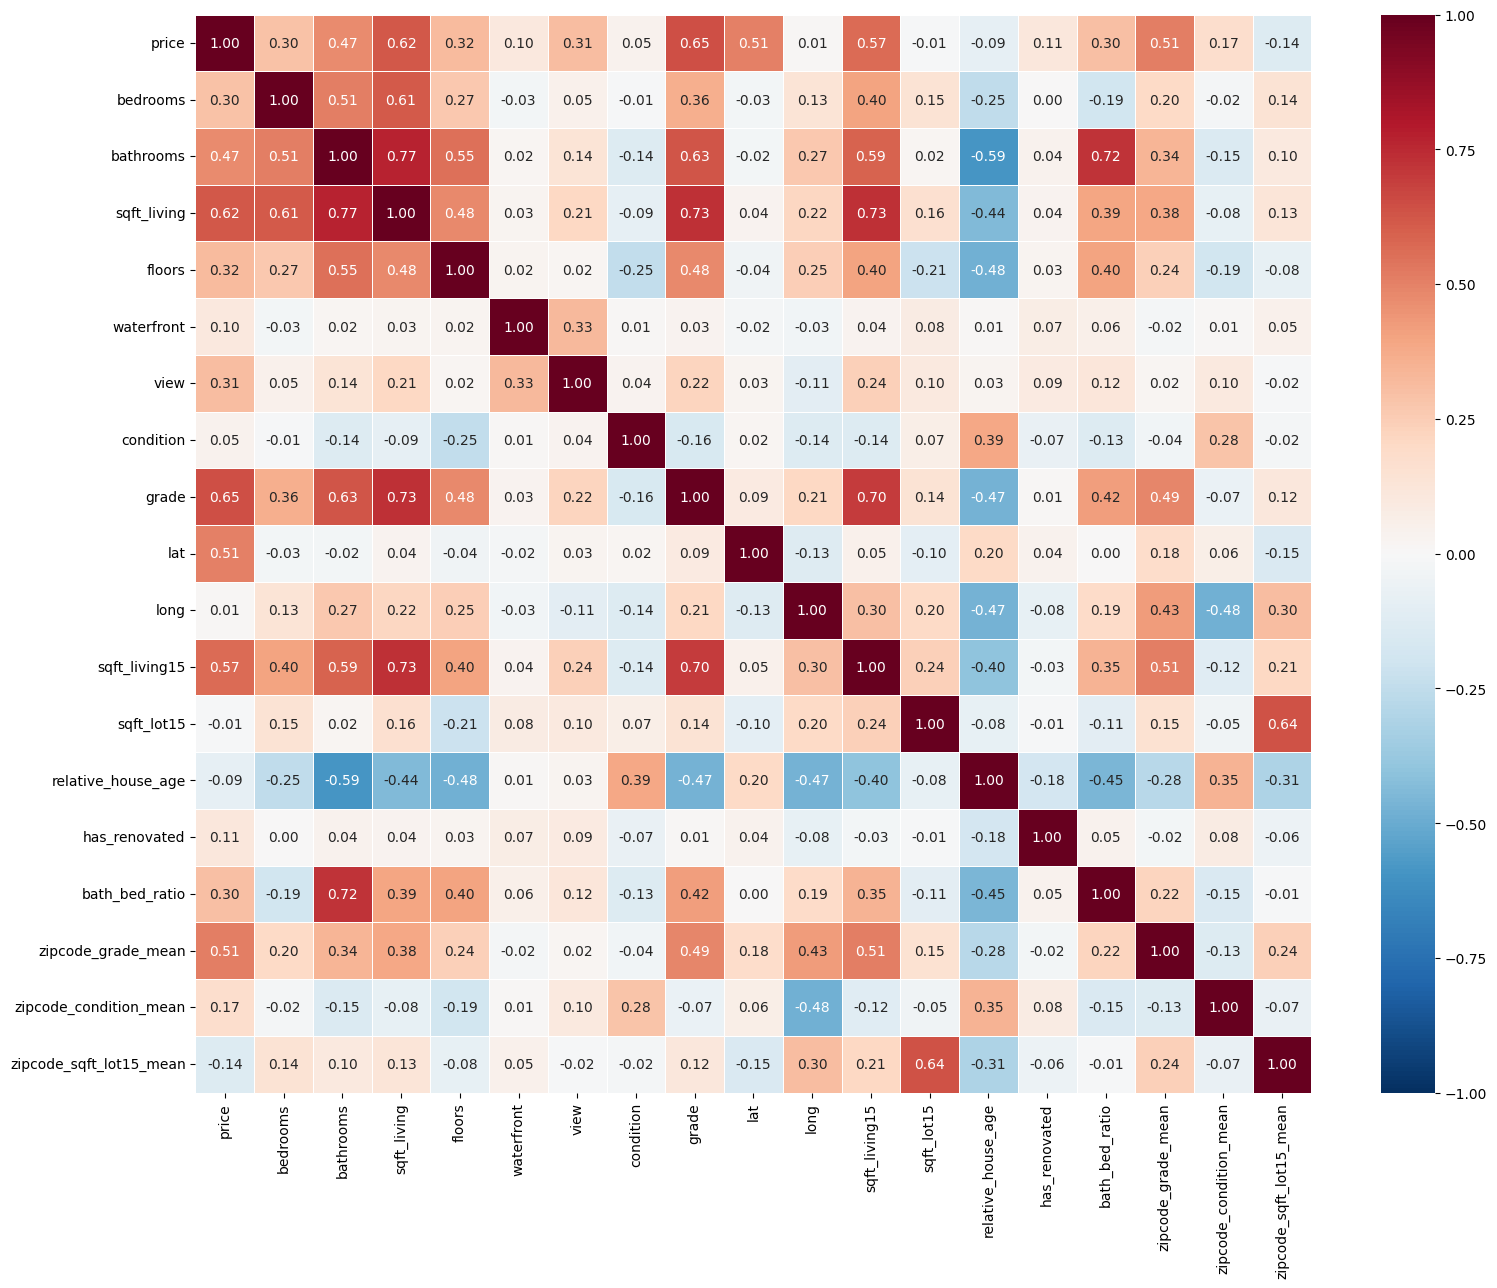

In [415]:
# Copy the dataframe for the linear regression model (so we can re run block with no issues)
df_lr_manual = df_final.copy()

# Create correlation matrix for the final dataframe (note it is the same as the as above)
corr = df_lr_manual.corr()

# Set a corr_threshold for the correlation coefficient
corr_threshold = 0.8

# Initialize a list to hold features to drop
to_drop = []

# Iterate through the columns of the correlation matrix
for i in range(len(corr.columns)):

    # Iterate through the rows of the correlation matrix
    for j in range(i):

        # Compare the absolute value of the correlation coefficient to the corr_threshold
        if abs(corr.iloc[i, j]) > corr_threshold:

            # Retrieve the names of the two features being compared
            col_i = corr.columns[i]
            col_j = corr.columns[j]

            # Determine which of the two features has a higher correlation with 'price'
            # The idea is to keep the feature that has a stronger relationship with the target variable
            if abs(corr[col_i]['price']) > abs(corr[col_j]['price']):

                # If the first feature has a higher correlation with 'price' add the second feature to the drop list
                to_drop.append(col_j)

            else:

                # If the second feature has a higher correlation or if they are equal add the first feature to the drop list
                to_drop.append(col_i)

# Drop the identified features
df_lr_manual_reduced = df_lr_manual.drop(columns=to_drop)

# Recompute the correlation matrix
lr_manual_reduced_corr = df_lr_manual_reduced.corr()

# Visualize the new correlation matrix
plt.figure(figsize=(18,14))
sns.heatmap(lr_manual_reduced_corr, annot=True, cmap="RdBu_r", vmin=-1, vmax=1, fmt=".2f", linewidth=0.5)
plt.show()


In [416]:
# Split the dataframe into ƒeatures (X) and target (y)
X = df_lr_manual_reduced.drop(columns=['price'])
y = df_lr_manual_reduced['price']

# Split the data into training and testing sets (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
lr_model = LinearRegression()

# Fit the model to the training data
lr_model.fit(X_train, y_train)

# Make predictions on the training and test sets
y_train_pred = lr_model.predict(X_train)
y_test_pred = lr_model.predict(X_test)

# Convert the predictions back to their original scale (for interpretation)
y_train_pred_original = np.expm1(y_train_pred)
y_test_pred_original = np.expm1(y_test_pred)
y_train_original = np.expm1(y_train)
y_test_original = np.expm1(y_test)

# Calculate and print metrics for the training set
print("Training set metrics (in dollars):")
print("MAE:", mean_absolute_error(y_train_original, y_train_pred_original))
print("MSE:", mean_squared_error(y_train_original, y_train_pred_original))
print("RMSE:", np.sqrt(mean_squared_error(y_train_original, y_train_pred_original)))
print("R2:", r2_score(y_train_original, y_train_pred_original))

# Calculate and print metrics for the test set
print("\nTest set metrics (in dollars):")
print("MAE:", mean_absolute_error(y_test_original, y_test_pred_original))
print("MSE:", mean_squared_error(y_test_original, y_test_pred_original))
print("RMSE:", np.sqrt(mean_squared_error(y_test_original, y_test_pred_original)))
print("R2:", r2_score(y_test_original, y_test_pred_original))



Training set metrics (in dollars):
MAE: 78643.14969264746
MSE: 15123581247.151606
RMSE: 122977.97057665087
R2: 0.7830739820338588

Test set metrics (in dollars):
MAE: 77388.05992241597
MSE: 13877805713.498024
RMSE: 117804.0988824159
R2: 0.7966136270133709


Based on the metrics,we can see that the model's predictions are off by an average of $81,715 based off the MAE. The RMSE being higher than the MAE,suggests there is still variability in the dataset. An R-squared value of approximately 0.79 for the test set means that around 79% of the variability in house prices is explained by the model, indicating fairly strong performance. Furthermore the similarity in metrics between the training and test sets suggests that the model is not over fitting and generalizes well to new data.

Comparing this to the initial model there is an overall improvement in accuracy as the initial model's predictions were off by an average of $125,654 with an R-squared of 0.69 and although there is still a higher RMSE compared to the MAE, the RMSE is generally lower here and the ratio has slightly improved.

### **3.2 Linear Regression - Eliminating Interdependent Features + Correlation Selection**

To continue to further experiment we implemented an additional filtering step that selects high correlation with the price based off a threshold.

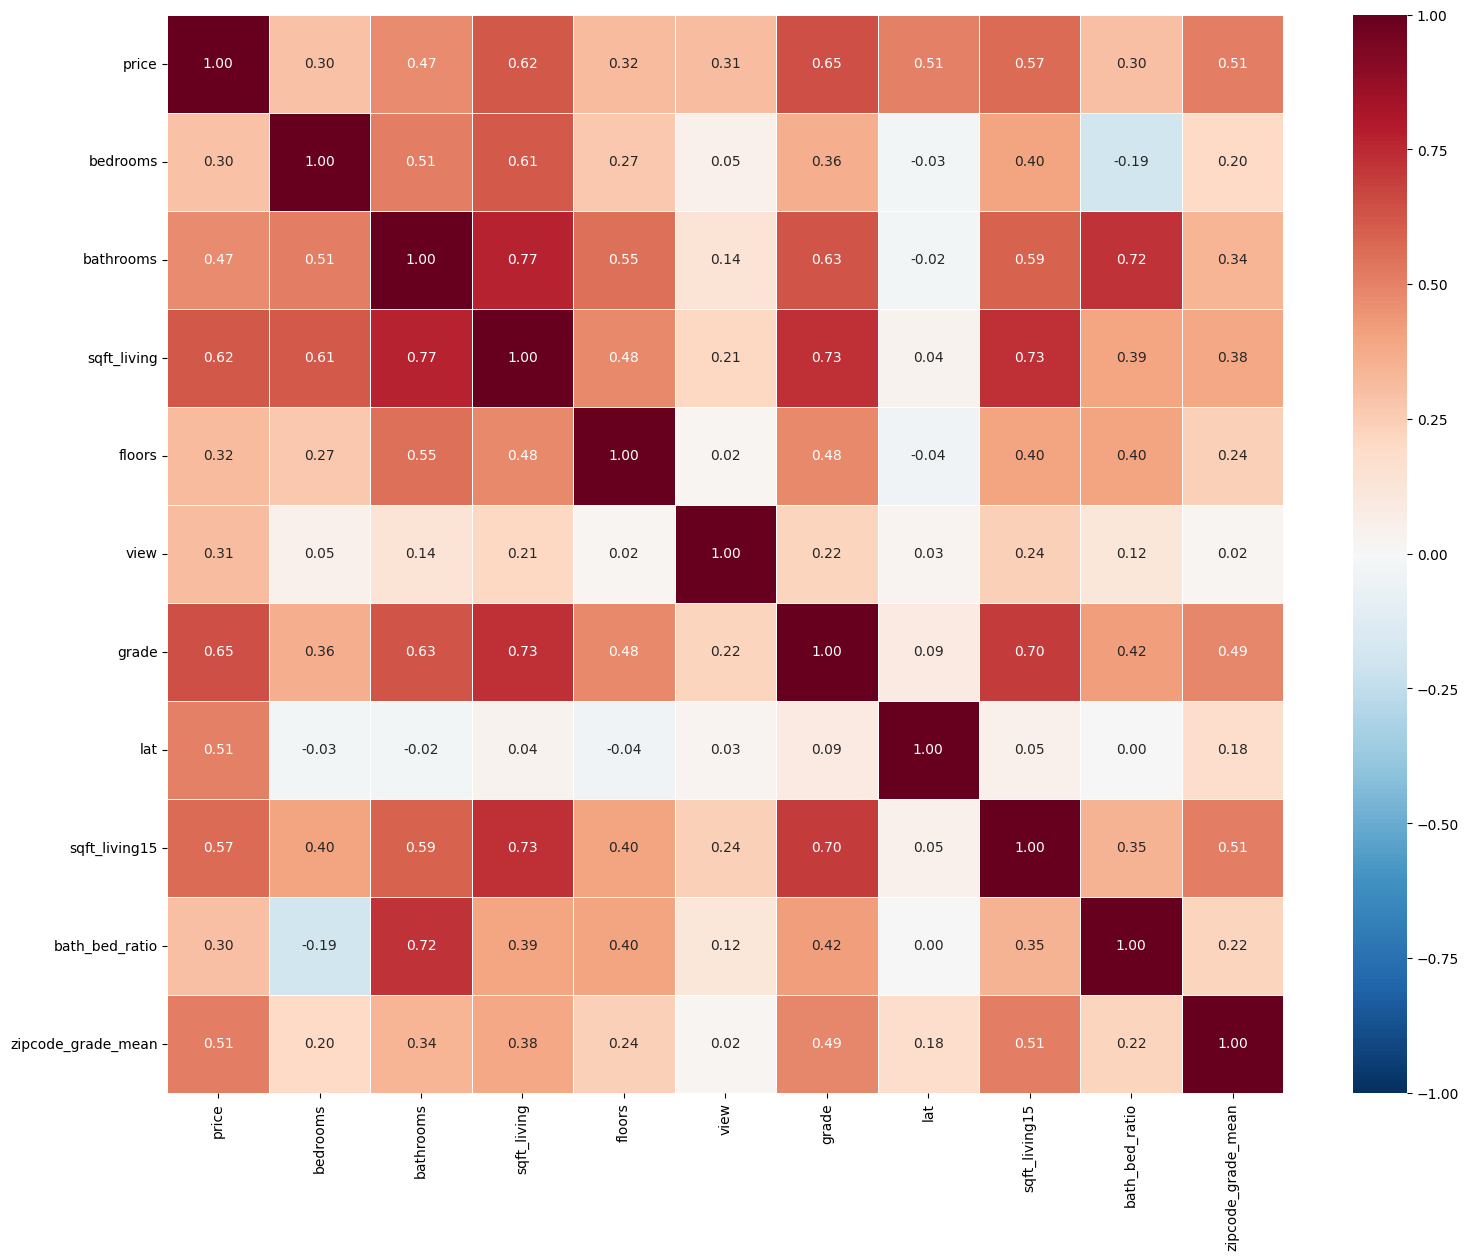

In [417]:
# Define a threshold for low correlation with the target variable
low_corr_threshold = 0.2 

# Initialize a list to hold features to drop
low_corr_to_drop = []

# Iterate through the columns of the correlation matrix
for col in lr_manual_reduced_corr.columns:

    # Check if the absolute correlation with the target variable is below the threshold
    if abs(lr_manual_reduced_corr[col]['price']) < low_corr_threshold:
        
        # Add the feature to the list of features to drop
        low_corr_to_drop.append(col)

# Drop the identified features
df_lr_manual_reduced_2 = df_lr_manual_reduced.drop(columns=low_corr_to_drop)

# Recompute the correlation matrix
lr_manual_reduced_corr_2 = df_lr_manual_reduced_2.corr()

# Visualize the new correlation matrix
plt.figure(figsize=(18,14))
sns.heatmap(lr_manual_reduced_corr_2, annot=True, cmap="RdBu_r", vmin=-1, vmax=1, fmt=".2f", linewidth=0.5)
plt.show()

In [418]:
# Split the dataframe into ƒeatures (X) and target (y)
X = df_lr_manual_reduced_2.drop(columns=['price'])
y = df_lr_manual_reduced_2['price']

# Split the data into training and testing sets (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
lr_model = LinearRegression()

# Fit the model to the training data
lr_model.fit(X_train, y_train)

# Make predictions on the training and test sets
y_train_pred = lr_model.predict(X_train)
y_test_pred = lr_model.predict(X_test)

# Convert the predictions back to their original scale (for interpretation)
y_train_pred_original = np.expm1(y_train_pred)
y_test_pred_original = np.expm1(y_test_pred)
y_train_original = np.expm1(y_train)
y_test_original = np.expm1(y_test)

# Calculate and print metrics for the training set
print("Training set metrics (in dollars):")
print("MAE:", mean_absolute_error(y_train_original, y_train_pred_original))
print("MSE:", mean_squared_error(y_train_original, y_train_pred_original))
print("RMSE:", np.sqrt(mean_squared_error(y_train_original, y_train_pred_original)))
print("R2:", r2_score(y_train_original, y_train_pred_original))

# Calculate and print metrics for the test set
print("\nTest set metrics (in dollars):")
print("MAE:", mean_absolute_error(y_test_original, y_test_pred_original))
print("MSE:", mean_squared_error(y_test_original, y_test_pred_original))
print("RMSE:", np.sqrt(mean_squared_error(y_test_original, y_test_pred_original)))
print("R2:", r2_score(y_test_original, y_test_pred_original))



Training set metrics (in dollars):
MAE: 103661.56612697644
MSE: 24567050886.813698
RMSE: 156738.79828177099
R2: 0.6476209943295164

Test set metrics (in dollars):
MAE: 102901.65020565559
MSE: 23977065101.181713
RMSE: 154845.2940879435
R2: 0.6486037918047465


#### **3.2.1 Analysis**


Considering the provided metrics and comparing them to the previously discussed model, we can see that further feature selection or elimination has led to worse performance, which is likely due to an insufficient number of features for the model to establish meaningful correlations and also high concentration of moderately intercorrelated features.

*Note: Due to this being an experiment and poor model performance we did not go into detail of the metrics*

### **3.3 Feature Selection wtih Principle Component Analysis (PCA)**

Rather than using our own algorithm for selecting features based interdependence and correlation to price, we can perform Principal Component Analysis (PCA). PCA itself is an unsupervised learning algorithm and allows us to reduce the dimensionality of our dataset by transforming the original features into a new set of variables called principal components which are orthogonal to each other while retaining information. They are ordered in a way that they are ranked by the variance they explain, allowing for effective feature selection.

To implement we first standardized the features to ensure uniform scaling across all variables and then applyed PCA to reduce the dimensionality of our dataset while retaining as much variance as possible. We then used the elbow method in conjunction with PCA, to accurately determine the optimal number of principal components to use. This method involves identifying a point in the graph of explained variance where the rate of increase significantly slows down resembling an 'elbow.' Once we found this optimal number of components, we continued to train a Linear Regression model on the transformed dataset comprising these principal components.

*Source: https://www.analyticsvidhya.com/blog/2016/03/pca-practical-guide-principal-component-analysis-python/#h-what-is-principal-component-analysis*

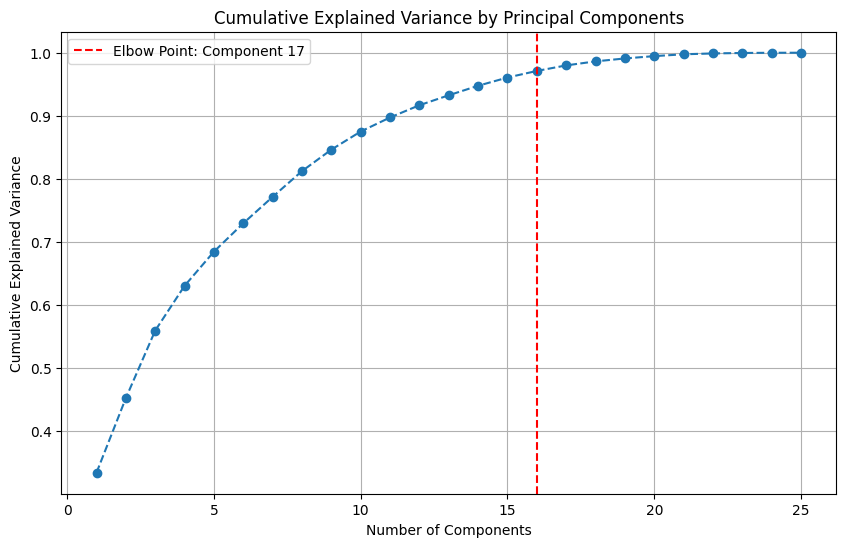

Elbow point at number of components: 17


In [419]:
# Copy the dataframe for the PCA analysis
df_lr_pca = df_final.copy()

# Drop the target variable ('price')
X = df_lr_pca.drop(columns=['price'])

# Standardize the features
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_standardized)

# Variance explained by each principal component
explained_variance = pca.explained_variance_ratio_

# Find the "elbow" in the variance explained
# Note: This is done to determine the optimal number of components to use
differences = np.diff(np.cumsum(explained_variance))
threshold = 0.01

# Note: Python indexes from 0 so add 1 to the elbow point
elbow_point = np.where(differences < threshold)[0][0] + 1

# Plotting the cumulative variance explained by principal components
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), np.cumsum(explained_variance), marker='o', linestyle='--')
plt.axvline(x=elbow_point, color='red', linestyle='--', label=f'Elbow Point: Component {elbow_point + 1}')
plt.title('Cumulative Explained Variance by Principal Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.legend()
plt.grid(True)
plt.show()

# Output the elbow point
print(f"Elbow point at number of components: {elbow_point + 1}")


Below is a visualization of the principle component were the values reflect the weight or coefficient of the original feature in the principal component indicating how much the feature contributes to the direction and magnitude of the principal component itself.

*Note: This is mainly done for visualization and demonstration.*

In [420]:
# Create a DataFrame to hold the loadings of PCA components.
loadings = pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(len(pca.components_))], index=X.columns)

# Display the loadings for each component
loadings


PC1       PC2       PC3       PC4       PC5  \
bedrooms                     0.132874 -0.002483  0.270131 -0.060888 -0.453134   
bathrooms                    0.225984  0.230371  0.291317  0.046806 -0.069702   
sqft_living                  0.225293  0.123025  0.351663 -0.079188 -0.142791   
sqft_lot                     0.079143 -0.437395  0.206753  0.154043  0.074088   
floors                       0.168499  0.322094  0.106836  0.090726 -0.093127   
waterfront                   0.001189 -0.017759  0.118315 -0.037480  0.581353   
view                         0.018764  0.023258  0.253225 -0.182949  0.496048   
condition                   -0.065815 -0.151702 -0.002469 -0.341013 -0.054488   
grade                        0.229708  0.125067  0.275467 -0.112203 -0.008660   
lat                         -0.007142  0.054134 -0.010242 -0.398035  0.050013   
long                         0.228190 -0.066392 -0.188661  0.270291  0.011940   
sqft_living15                0.248086  0.035734  0.244789 -0.106879 -0.010133   
sqft_lot15                   0.080515 -0.448290  0.212746  0.153367  0.085753   
relative_house_age          -0.215132 -0.130683 -0.112512 -0.375943  0.000572   
has_renovated               -0.008765  0.066879  0.094803  0.024341  0.212581   
bath_bed_ratio               0.150169  0.270159  0.117333  0.093623  0.286482   
zipcode_bedrooms_mean        0.259711 -0.235657 -0.046551 -0.083407 -0.082941   
zipcode_bathrooms_mean       0.316750 -0.062311 -0.209736 -0.039409  0.025556   
zipcode_sqft_living_mean     0.308259 -0.118789 -0.147700 -0.198406  0.026233   
zipcode_grade_mean           0.286496 -0.088915 -0.141257 -0.284694  0.031444   
zipcode_condition_mean      -0.125679 -0.070436  0.196674 -0.408691 -0.093593   
zipcode_bath_bed_ratio_mean  0.267947  0.085005 -0.269663 -0.005224  0.105057   
zipecode_sqft_living15_mean  0.308155 -0.140352 -0.136653 -0.172922  0.022573   
zipcode_sqft_lot15_mean      0.111967 -0.397971  0.157707  0.220614 -0.005644   
zipcode_floor_mean           0.243683  0.146293 -0.301932  0.020910  0.035640   

                                  PC6       PC7       PC8       PC9      PC10  \
bedrooms                     0.340161  0.306584  0.200741  0.016383  0.200428   
bathrooms                   -0.036107 -0.186707 -0.006960 -0.143057  0.167647   
sqft_living                  0.128591  0.030746 -0.045597 -0.111285  0.015336   
sqft_lot                     0.079506  0.051935 -0.175370 -0.223095 -0.084024   
floors                       0.017699 -0.020686  0.080705  0.183032  0.132464   
waterfront                   0.279674  0.066502  0.221108  0.325453  0.530796   
view                         0.286758  0.057957  0.050216  0.040439 -0.410181   
condition                    0.207212 -0.424018  0.215929 -0.537859  0.321708   
grade                       -0.024562  0.003006 -0.139437  0.040623 -0.166203   
lat                         -0.226313  0.356127 -0.580575 -0.056106  0.408434   
long                         0.128601 -0.013377 -0.003325 -0.115174  0.157488   
sqft_living15                0.085609  0.019969 -0.132513  0.029302 -0.206693   
sqft_lot15                   0.036501  0.038552 -0.165881 -0.186771 -0.058042   
relative_house_age           0.224955 -0.045690 -0.133191 -0.042854 -0.080351   
has_renovated               -0.420387  0.518654  0.458877 -0.465571 -0.009727   
bath_bed_ratio              -0.300805 -0.462713 -0.166250 -0.184463  0.061017   
zipcode_bedrooms_mean       -0.155613 -0.101009  0.219761  0.211977  0.011565   
zipcode_bathrooms_mean       0.024648 -0.017525  0.081804 -0.001178 -0.031564   
zipcode_sqft_living_mean    -0.097574  0.011964  0.045523  0.072182 -0.016150   
zipcode_grade_mean          -0.124149  0.043291 -0.000101  0.067773 -0.036933   
zipcode_condition_mean      -0.272728 -0.190628  0.311010  0.164912 -0.138579   
zipcode_bath_bed_ratio_mean  0.144542  0.053265 -0.056071 -0.162739 -0.050323   
zipecode_sqft_living15_mean -0.107891  0.011408  0.033830  0.082

In [421]:
# Split the dataframe into features (X) and target (y)
X = df_lr_pca.drop(columns=['price'])
y = df_lr_pca['price']

# Split the data into training and testing sets (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the training and test features
scaler = StandardScaler()
X_train_standardized = scaler.fit_transform(X_train)
X_test_standardized = scaler.transform(X_test)

# Apply PCA transformation using the previously calculated elbow_point
pca = PCA(n_components=elbow_point)
X_train_pca = pca.fit_transform(X_train_standardized)
X_test_pca = pca.transform(X_test_standardized)

# Train the model and make predictions for PCA-based Linear Regression
lr_pca_model = LinearRegression()
lr_pca_model.fit(X_train_pca, y_train)
y_train_pred_pca = lr_pca_model.predict(X_train_pca)
y_test_pred_pca = lr_pca_model.predict(X_test_pca)

# Convert the predictions back to their original scale (for interpretation)
y_train_pred_original = np.expm1(y_train_pred_pca)
y_test_pred_original = np.expm1(y_test_pred_pca)
y_train_original = np.expm1(y_train)
y_test_original = np.expm1(y_test)

# Calculate and print metrics for the training set
print("Training set metrics (in dollars):")
print("MAE:", mean_absolute_error(y_train_original, y_train_pred_original))
print("MSE:", mean_squared_error(y_train_original, y_train_pred_original))
print("RMSE:", np.sqrt(mean_squared_error(y_train_original, y_train_pred_original)))
print("R2:", r2_score(y_train_original, y_train_pred_original))

# Calculate and print metrics for the test set
print("\nTest set metrics (in dollars):")
print("MAE:", mean_absolute_error(y_test_original, y_test_pred_original))
print("MSE:", mean_squared_error(y_test_original, y_test_pred_original))
print("RMSE:", np.sqrt(mean_squared_error(y_test_original, y_test_pred_original)))
print("R2:", r2_score(y_test_original, y_test_pred_original))

Training set metrics (in dollars):
MAE: 79450.84363485138
MSE: 15381859317.307604
RMSE: 124023.6240290841
R2: 0.7793693546462502

Test set metrics (in dollars):
MAE: 78263.36869362467
MSE: 14117213643.30989
RMSE: 118815.88127565225
R2: 0.7931049807969656


From the model we can see that the model also performed fairly well, and **very** similarly to the linear regression model in 3.1. 

Based on the metrics, we can see that the model's predictions are off by an average of $78,263 based off the MAE agin again, the RMSE suggests there is still variability in the dataset. An R-squared value of approximately 0.793 for the test set means that around 79.3% of the variability in house prices is explained by the model, indicating fairly strong performance. Furthermore the similarity in metrics between the training and test sets suggests that the model is not over fitting and generalizes well to new data.

### **3.4 Alternate Model - Random Forest**

A random forest is an essemble of decision trees. A decision tree splits the features in such a way that each split maximizes the predictive power. For numerical data, each feature is split into an "Over" or "Under" in relation to some value. Give each tree some random subset of the training data and train the tree on that. Then train other trees on other subsets. To predict on test data, average predictions from our emsemble of trees.

Sources:
*https://www.datacamp.com/tutorial/random-forests-classifier-python*
*https://scikit-learn.org/stable/modules/ensemble.html*

Workflow :
- Split the data in a 3:1 ratio for train:test
- Clean data and drop undesirable features
- Call algo on training data with seed of random_state = 9999
- Call algo on test data andoutput the results (ie R-Squared)


In [422]:
df_final.head()


price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0  12.309987         3       1.00     7.074117  8.639588     1.0           0   
1  13.195616         3       2.25     7.852050  8.887791     2.0           0   
2  12.100718         2       1.00     6.647688  9.210440     1.0           0   
3  13.311331         4       3.00     7.581210  8.517393     1.0           0   
4  13.142168         3       2.00     7.427144  8.997271     1.0           0   

   view  condition  grade      lat     long  sqft_living15  sqft_lot15  \
0     0          3      7  47.5112 -122.257       7.201171    8.639588   
1     0          3      7  47.7210 -122.319       7.433075    8.941153   
2     0          3      6  47.7379 -122.233       7.908755    8.995041   
3     0          5      7  47.5208 -122.393       7.215975    8.517393   
4     0          3      8  47.6168 -122.045       7.496097    8.923191   

   relative_house_age  has_renovated  bath_bed_ratio  zipcode_bedrooms_mean  \
0                  59              0        0.333333               3.296000   
1                  23              1        0.750000               3.175637   
2                  82              0        0.500000               3.486590   
3                  49              0        0.750000               3.048544   
4                  28              0        0.666667               3.602597   

   zipcode_bathrooms_mean  zipcode_sqft_living_mean  zipcode_grade_mean  \
0                1.707000                  7.367819            6.796000   
1                1.722380                  7.393119            7.150142   
2                2.138889                  7.612142            7.643678   
3                1.802184                  7.420671            7.393204   
4                2.418831                  7.786222            8.618182   

   zipcode_condition_mean  zipcode_bath_bed_ratio_mean  \
0                3.332000                     0.528117   
1                3.388102                     0.547545   
2                3.302682                     0.627187   
3                3.475728                     0.600930   
4                3.122078                     0.686483   

   zipecode_sqft_living15_mean  zipcode_sqft_lot15_mean  zipcode_floor_mean  
0                     7.371984                 8.928145            1.178000  
1                     7.399317                 8.934121            1.216714  
2                     7.639514                 9.114235            1.406130  
3                     7.426222                 8.697158            1.322816  
4                     7.786668                 9.151206            1.698701

In [423]:
df_final.describe()

price      bedrooms     bathrooms   sqft_living      sqft_lot  \
count  17586.000000  17586.000000  17586.000000  17586.000000  17586.000000   
mean      13.001060      3.356363      2.026200      7.526617      8.893769   
std        0.484494      0.786352      0.677521      0.384405      0.487562   
min       11.643962      2.000000      0.750000      6.089045      7.407924   
25%       12.644331      3.000000      1.500000      7.266129      8.556606   
50%       12.985744      3.000000      2.000000      7.544861      8.919520   
75%       13.336670      4.000000      2.500000      7.800163      9.184253   
max       14.416598      5.000000      3.500000      8.692994     10.395467   

             floors    waterfront          view     condition         grade  \
count  17586.000000  17586.000000  17586.000000  17586.000000  17586.000000   
mean       1.424144      0.003924      0.201751      3.440293      7.534687   
std        0.488614      0.062517      0.697295      0.660938      1.047937   
min        1.000000      0.000000      0.000000      1.000000      4.000000   
25%        1.000000      0.000000      0.000000      3.000000      7.000000   
50%        1.000000      0.000000      0.000000      3.000000      7.000000   
75%        2.000000      0.000000      0.000000      4.000000      8.000000   
max        3.000000      1.000000      4.000000      5.000000     12.000000   

                lat          long  sqft_living15    sqft_lot15  \
count  17586.000000  17586.000000   17586.000000  17586.000000   
mean      47.556622   -122.219560       7.524015      8.880975   
std        0.140298      0.133275       0.305376      0.436121   
min       47.155900   -122.512000       6.621406      7.518064   
25%       47.460425   -122.326000       7.307202      8.564888   
50%       47.566750   -122.235000       7.507141      8.922792   
75%       47.679700   -122.144000       7.736744      9.159889   
max       47.777600   -121.319000       8.455531     10.240959   

       relative_house_age  has_renovated  bath_bed_ratio  \
count        17586.000000   17586.000000    17586.000000   
mean            43.491698       0.039975        0.611966   
std             28.579899       0.195906        0.187967   
min             -1.000000       0.000000        0.187500   
25%             20.000000       0.000000        0.500000   
50%             41.000000       0.000000        0.600000   
75%             62.000000       0.000000        0.750000   
max            115.000000       1.000000        1.750000   

       zipcode_bedrooms_mean  zipcode_bathrooms_mean  \
count           17586.000000            17586.000000   
mean                3.356363                2.026200   
std                 0.214815                0.266765   
min                 2.806452                1.441598   
25%                 3.178313                1.783602   
50%                 3.391685                2.033784   
75%                 3.486590                2.245968   
max                 3.868778                2.681373   

       zipcode_sqft_living_mean  zipcode_grade_mean  zipcode_condition_mean  \
count              17586.000000        17586.000000            17586.000000   
mean                   7.526617            7.534687                3.440293   
std                    0.154900            0.510037                0.187970   
min                    7.248695            6.545082                3.020080   
25%                    7.393119            7.200514                3.317901   
50%                    7.510140            7.415638                3.440613   
75%                    7.628715            7.822816                3.591304   
max                    7.968914            9.066667                3.855204   

       zipcode_bath_bed_ratio_mean  zipecode_sqft_living15_mean  \
count                 17586.000000                 17586.000000   
mean                      0.611966                     7.524015   
std                       0.059120  

In [424]:
# Create a copy of the dataframe for the Random Forest model
df_rf = df_final.copy()

# Split the dataframe into features (X) and target (y)
X = df_rf.drop(columns=['price', 'lat', 'long'])
y = df_rf['price']

# Split the data into training and testing sets (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Regressor model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the training and test sets
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

# Calculate and print metrics for the training set
print("Training set metrics:")
print("MAE:", mean_absolute_error(y_train, y_train_pred))
print("MSE:", mean_squared_error(y_train, y_train_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_train, y_train_pred)))
print("R2:", r2_score(y_train, y_train_pred))

# Calculate and print metrics for the test set
print("\nTest set metrics:")
print("MAE:", mean_absolute_error(y_test, y_test_pred))
print("MSE:", mean_squared_error(y_test, y_test_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_test_pred)))
print("R2:", r2_score(y_test, y_test_pred))

Training set metrics:
MAE: 0.046569621192692576
MSE: 0.0043214527741210216
RMSE: 0.06573775759881852
R2: 0.9816966947970828

Test set metrics:
MAE: 0.11985812797455468
MSE: 0.027718154662972772
RMSE: 0.16648770123637593
R2: 0.8790219244218821


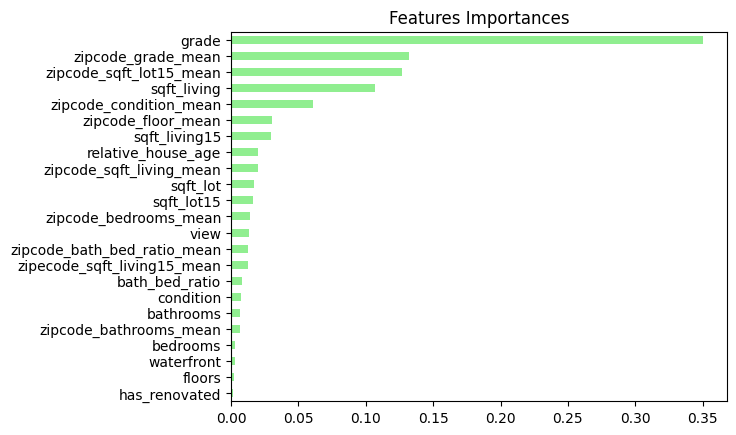

In [425]:
# Plot feature importances
importances = pd.Series(data=rf_model.feature_importances_, index=X_train.columns)

# Sort importances
importances_sorted = importances.sort_values()

# Draw a horizontal barplot of importances_sorted
importances_sorted.plot(kind='barh', color='lightgreen')

plt.title('Features Importances')
plt.show()

In [426]:
# Extract feature importances
importances = rf_model.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Selecting the top 10 features
N = 10
top_n_indices = indices[:N]

# Create new training and test sets with only the top 10 features
top_feature_train = X_train.iloc[:, top_n_indices]
top_feature_test = X_test.iloc[:, top_n_indices]

# Initialize and train the Random Forest Regressor model using only the top 10 features
rf_top_features = RandomForestRegressor(random_state=42)
rf_top_features.fit(top_feature_train, y_train)

# Make predictions on the training and test sets
y_train_pred_top = rf_top_features.predict(top_feature_train)
y_test_pred_top = rf_top_features.predict(top_feature_test)

# Calculate and print metrics for the training set using top 10 features
print("Training set metrics (Top 10 features):")
print("MAE:", mean_absolute_error(y_train, y_train_pred_top))
print("MSE:", mean_squared_error(y_train, y_train_pred_top))
print("RMSE:", np.sqrt(mean_squared_error(y_train, y_train_pred_top)))
print("R2:", r2_score(y_train, y_train_pred_top))

# Calculate and print metrics for the test set using top 10 features
print("\nTest set metrics (Top 10 features):")
print("MAE:", mean_absolute_error(y_test, y_test_pred_top))
print("MSE:", mean_squared_error(y_test, y_test_pred_top))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_test_pred_top)))
print("R2:", r2_score(y_test, y_test_pred_top))

Training set metrics (Top 10 features):
MAE: 0.04894540536818977
MSE: 0.004808365372700448
RMSE: 0.06934237789909176
R2: 0.9796343999243227

Test set metrics (Top 10 features):
MAE: 0.12668771931027878
MSE: 0.031225806056542744
RMSE: 0.17670825124068978
R2: 0.863712502833299


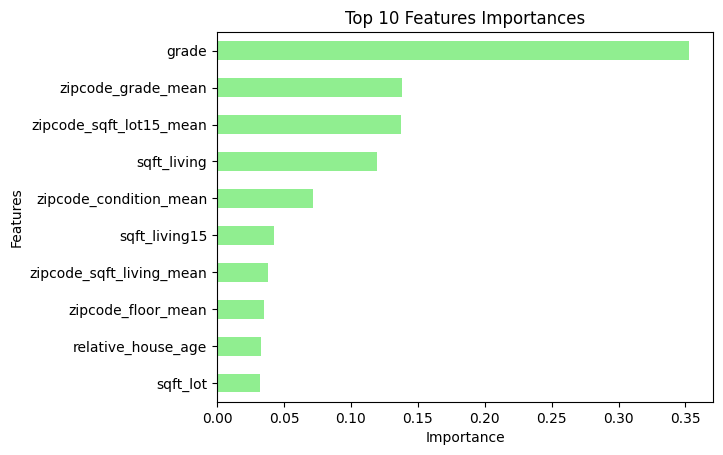

In [427]:
# Plot feature importances
importances = pd.Series(data=rf_top_features.feature_importances_, index=top_feature_train.columns)

# Sort importances
importances_sorted = importances.sort_values()

# Draw a horizontal barplot of importances_sorted
importances_sorted.plot(kind='barh', color='lightgreen')

plt.title('Top 10 Features Importances')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()


#### 3.3.1 Analysis 

Grade explains a third of the variance, while condition predicted almost nothing. Buyers value the original build grade more than the home's present condition. Perhaps they reason a degraded home can be restored to its original condition, but a home built with poor materials from the start cannot be improved.

Bathrooms explain more of the variance in the price than bedrooms. We think because a home typically has more bedrooms than bathrooms, people's perception of a home's value/price is more influenced by the number of the bathrooms than bedrooms.